In [1]:
import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

# Plot experiments

In [4]:
experiments_dir = "Y:/out/pointcloud"
#experiments_dir = "C:/Users/lucas/Desktop/pointcloud"


experiments = ['ycb_con_sr',
               'ycb_sn',
               'ycb_sr',
               'ycb_con_grasps',
               'ycb_con_grasps_noise'
               ]

pretrained = ['shapenet_1plane',
              'shapenet_pointconv',
              'shapenet_grid32']

### Load train and validation

In [3]:
df_exp_train = []
df_exp_test = []

for experiment in experiments:
    train_pth = os.path.join(experiments_dir, experiment, "generation_train/eval_meshes.csv")
    test_pth = os.path.join(experiments_dir, experiment, "generation_test/eval_meshes.csv")
    
    exp_train = pd.read_csv(train_pth)
    exp_train['experiment'] = experiment
    del exp_train["class name"]
    df_exp_train.append(exp_train)
    
    exp_test = pd.read_csv(test_pth)
    exp_test['experiment'] = experiment
    del exp_test["class name"]
    df_exp_test.append(exp_test)

df_exp_train = pd.concat(df_exp_train)
df_exp_test = pd.concat(df_exp_test)

df_exp_train = df_exp_train.set_index("experiment")
df_exp_test = df_exp_test.set_index("experiment")

FileNotFoundError: [Errno 2] No such file or directory: 'Y:/out/pointcloud\\ycb_con_sr\\generation_train/eval_meshes.csv'

### Load pretrained

In [ ]:
df_exp_pretrain = []

for experiment in pretrained:
    pretrain_pth = os.path.join(experiments_dir, experiment, "generation_pretrained/eval_meshes.csv")
    
    exp_pretrain = pd.read_csv(pretrain_pth)
    exp_pretrain['experiment'] = experiment
    del exp_pretrain["class name"]
    df_exp_pretrain.append(exp_pretrain)
    

df_exp_pretrain = pd.concat(df_exp_pretrain)

df_exp_pretrain = df_exp_pretrain.set_index("experiment")

### Plot

In [ ]:
for metric in df_exp_train:
    
    df = pd.DataFrame({'train': df_exp_train[metric],
                       'test': df_exp_test[metric],
                      'pretrained': df_exp_pretrain[metric]})
    ax = df.plot.barh()
    #ax.set_xlim(0, 1)
    ax.legend(title='Split', bbox_to_anchor=(1.05, 1.02), loc='upper left')

    ax.set_title(metric,fontsize= 15)

In [ ]:
df_exp_train

In [ ]:
df

# Plot #grasps

In [ ]:
experiments_dir = "C:/Users/lucas/Desktop/pointcloud"
eval_con_dir = "Y:/out/pointcloud/ycb_con/generation_grasps/eval_meshes.csv"



In [ ]:
# Load evaluation trained with no grasps
eval_con_dir = "Y:/out/pointcloud/ycb_con/generation_grasps/eval_meshes.csv"
eval_con = pd.read_csv(eval_con_dir)

eval_con['n_grasps'] = eval_con['class name'].apply(lambda n_grasps: int(n_grasps.split("_")[0]))
eval_con = eval_con.sort_values('n_grasps')
eval_con = eval_con.reset_index(drop=True)


# Load evaluation trained with scale + rotation but no grasps
eval_sr_dir = "Y:/out/pointcloud/ycb_sr/generation_grasps/eval_meshes.csv"
eval_sr = pd.read_csv(eval_sr_dir)

eval_sr['n_grasps'] = eval_sr['class name'].apply(lambda n_grasps: int(n_grasps.split("_")[0]))
eval_sr = eval_sr.sort_values('n_grasps')
eval_sr = eval_sr.reset_index(drop=True)


# Load evaluation trained withscale + rotation and different grasps
eval_con_grasps_dir = "Y:/out/pointcloud/ycb_con_grasps_sr/generation_grasps/eval_meshes.csv"
eval_con_grasps = pd.read_csv(eval_con_grasps_dir)

eval_con_grasps['n_grasps'] = eval_con_grasps['class name'].apply(lambda n_grasps: int(n_grasps.split("_")[0]))
eval_con_grasps = eval_con_grasps.sort_values('n_grasps')
eval_con_grasps = eval_con_grasps.reset_index(drop=True)

# Load new
#eval_pointconv_dir = "Y:/out/pointcloud/ycb_pointconv/generation_grasps/eval_meshes.csv"
#eval_pointconv = pd.read_csv(eval_pointconv_dir)

#eval_pointconv['n_grasps'] = eval_pointconv['class name'].apply(lambda n_grasps: int(n_grasps.split("_")[0]))
#eval_pointconv = eval_pointconv.sort_values('n_grasps')
#eval_pointconv = eval_pointconv.reset_index(drop=True)

In [ ]:
eval_con_grasps['experiment'] = 'Scale + Rotation + Grasps'
eval_sr['experiment'] = 'Scale + Rotation'
eval_con['experiment'] = 'Vanilla'
#eval_pointconv['experiment'] = "pointconv"

eval_all = pd.concat([eval_con_grasps, eval_sr, eval_con])

eval_all = eval_all.reset_index(drop=True)

In [ ]:
plt.rcParams["figure.dpi"] = 100

In [ ]:
for metric in eval_con_grasps:
    try:
        df = eval_all.pivot(index='n_grasps', columns='experiment', values=metric)
        y_top = df.max().max() * 1.3
        ax = df.plot(marker='o', xlim=(0,55))
        ax.set_title(metric,fontsize= 15)
    except:
        pass

# Compare more training ``ycb_con_grasps`` and ``ycb_con_grasps_noise``

### Load test 1

In [6]:
test_con_pth = "Y:/out/pointcloud/ycb_con_grasps_no_sr/generation_test/eval_meshes.csv"
exp_test_con = pd.read_csv(test_con_pth)
exp_test_con['experiment'] = 'ycb_con_grasps'
del exp_test_con["class name"]

test_con_noise_pth = "Y:/out/pointcloud/ycb_con_grasps_noise/generation_test/eval_meshes.csv"
exp_test_con_noise = pd.read_csv(test_con_noise_pth)
exp_test_con_noise['experiment'] = 'ycb_con_grasps_noise'
del exp_test_con_noise["class name"]

exp_test_1 = pd.concat([exp_test_con, exp_test_con_noise])
exp_test_1 = exp_test_1.set_index("experiment")

FileNotFoundError: [Errno 2] No such file or directory: 'Y:/out/pointcloud/ycb_con_grasps_no_sr/generation_test/eval_meshes.csv'

### Load test 2

In [ ]:
test_con_pth = "Y:/out/pointcloud/ycb_con_grasps/generation_test-2/eval_meshes.csv"
exp_test_con = pd.read_csv(test_con_pth)
exp_test_con['experiment'] = 'ycb_con_grasps'
del exp_test_con["class name"]

test_con_noise_pth = "Y:/out/pointcloud/ycb_con_grasps_noise/generation_test-2/eval_meshes.csv"
exp_test_con_noise = pd.read_csv(test_con_noise_pth)
exp_test_con_noise['experiment'] = 'ycb_con_grasps_noise'
del exp_test_con_noise["class name"]

exp_test_2 = pd.concat([exp_test_con, exp_test_con_noise])
exp_test_2 = exp_test_2.set_index("experiment")

### Plot

In [ ]:
for metric in exp_test_1:
    
    df = pd.DataFrame({'Train 1': exp_test_1[metric],
                       'Train 2': exp_test_2[metric]})
    ax = df.plot.barh()
    #ax.set_xlim(0, 1)
    ax.legend(title='Split', bbox_to_anchor=(1.05, 1.02), loc='upper left')

    ax.set_title(metric,fontsize= 15)

# Improved plot #grasps

Transparency: https://gist.github.com/lopspower/03fb1cc0ac9f32ef38f4
* 100% — FF
* 90% — E6
* 80% — CC
* 75% — BF
* 70% — B3
* 60% — 99
* 0% — 00

In [7]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [8]:
eval_con_dir = "Y:/out/pointcloud/ycb_con/generation_grasps/eval_meshes.csv"

In [9]:
experiments_dir = "Y:\out\pointcloud"

experiments_dict = {
    "Pretrained": "ycb_sn",
    "Vanilla": "ycb_con",
    "Scale + Rotation": "ycb_sr",
    "Grasps": "ycb_con_grasps_no_sr",
    "Scale + Rotatation + Grasps": "ycb_con_grasps_sr"
}

experiments_colors = {
    "Pretrained": '#e15759',
    "Vanilla": '#f28e2b',
    "Scale + Rotation": '#edc948',
    "Grasps": '#4E79A7', #'#6298AD',
    "Scale + Rotatation + Grasps": '#59a14f'
}

In [10]:
eval_pds = []
for experiment, folder in experiments_dict.items():
    eval_dir = os.path.join("Y:/out/pointcloud/", folder, "generation_grasps/eval_meshes.csv")
    eval_pd = pd.read_csv(eval_dir)
    eval_pd['n_grasps'] = eval_pd['class name'].apply(lambda n_grasps: int(n_grasps.split("_")[0]))
    eval_pd = eval_pd.sort_values('n_grasps')
    eval_pd = eval_pd.reset_index(drop=True)
    eval_pd['experiment'] = experiment

    eval_pds.append(eval_pd)


In [11]:
eval_all = pd.concat(eval_pds)
eval_all = eval_all.reset_index(drop=True)

eval_all.rename(columns={"n_grasps": "#grasps"}, inplace=True)

eval_all_contr = eval_all[eval_all.experiment != "Pretrained"]

In [12]:
eval_all.head()

,class name,accuracy (mesh),accuracy2 (mesh),chamfer-L1 (mesh),chamfer-L2 (mesh),completeness (mesh),completeness2 (mesh),f-score (mesh),f-score-15 (mesh),f-score-20 (mesh),iou (mesh),normals (mesh),normals accuracy (mesh),normals completeness (mesh),#grasps,experiment
0,5_grasps,0.019917,0.001290,0.020834,0.002057,0.021751,0.002824,0.319149,0.568401,0.731437,0.105660,0.753953,0.774431,0.733474,5,Pretrained
1,10_grasps,0.018303,0.000718,0.020146,0.001759,0.021988,0.002800,0.321722,0.571132,0.733639,0.094467,0.754307,0.777848,0.730766,10,Pretrained
2,20_grasps,0.018107,0.000549,0.018695,0.001285,0.019283,0.002021,0.322570,0.573214,0.737485,0.100006,0.764937,0.783473,0.746401,20,Pretrained
3,50_grasps,0.020461,0.000828,0.017565,0.000870,0.014670,0.000913,0.305548,0.543115,0.708409,0.170054,0.807848,0.813176,0.802521,50,Pretrained
4,5_grasps,0.074823,0.012988,0.044907,0.006692,0.014992,0.000395,0.101118,0.207155,0.311208,0.628049,0.805314,0.768408,0.842220,5,Vanilla


## Pretrained

In [13]:
experiments_colors = {
    "Pretrained": '#e15759' + 'FF',
    "Vanilla": '#f28e2b' + '00',
    "Scale + Rotation": '#edc948' + '00',
    "Grasps": '#4E79A7' + '00',
    "Scale + Rotatation + Grasps": '#59a14f' + '00'
}

col_sort = ["Pretrained", "Vanilla", "Scale + Rotation", "Grasps", "Scale + Rotatation + Grasps"]

Text(0.5, 0, '#grasps')

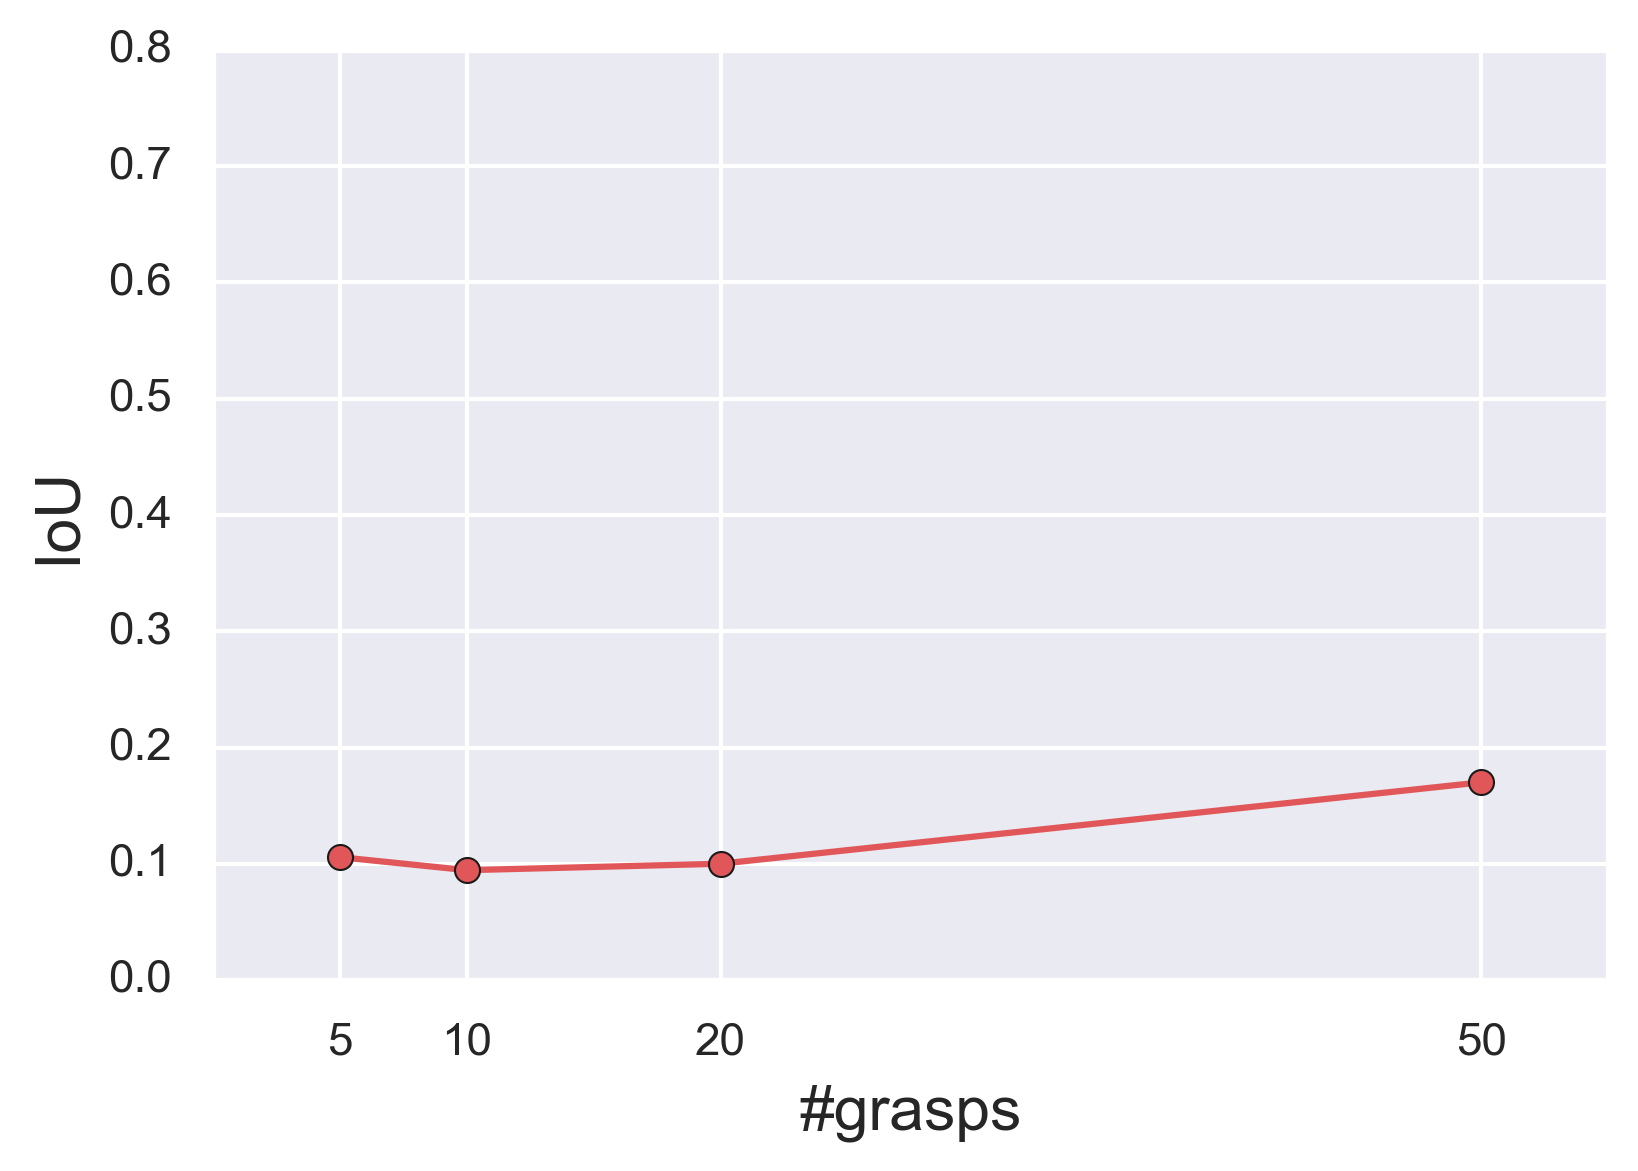

<Figure size 1800x1200 with 0 Axes>

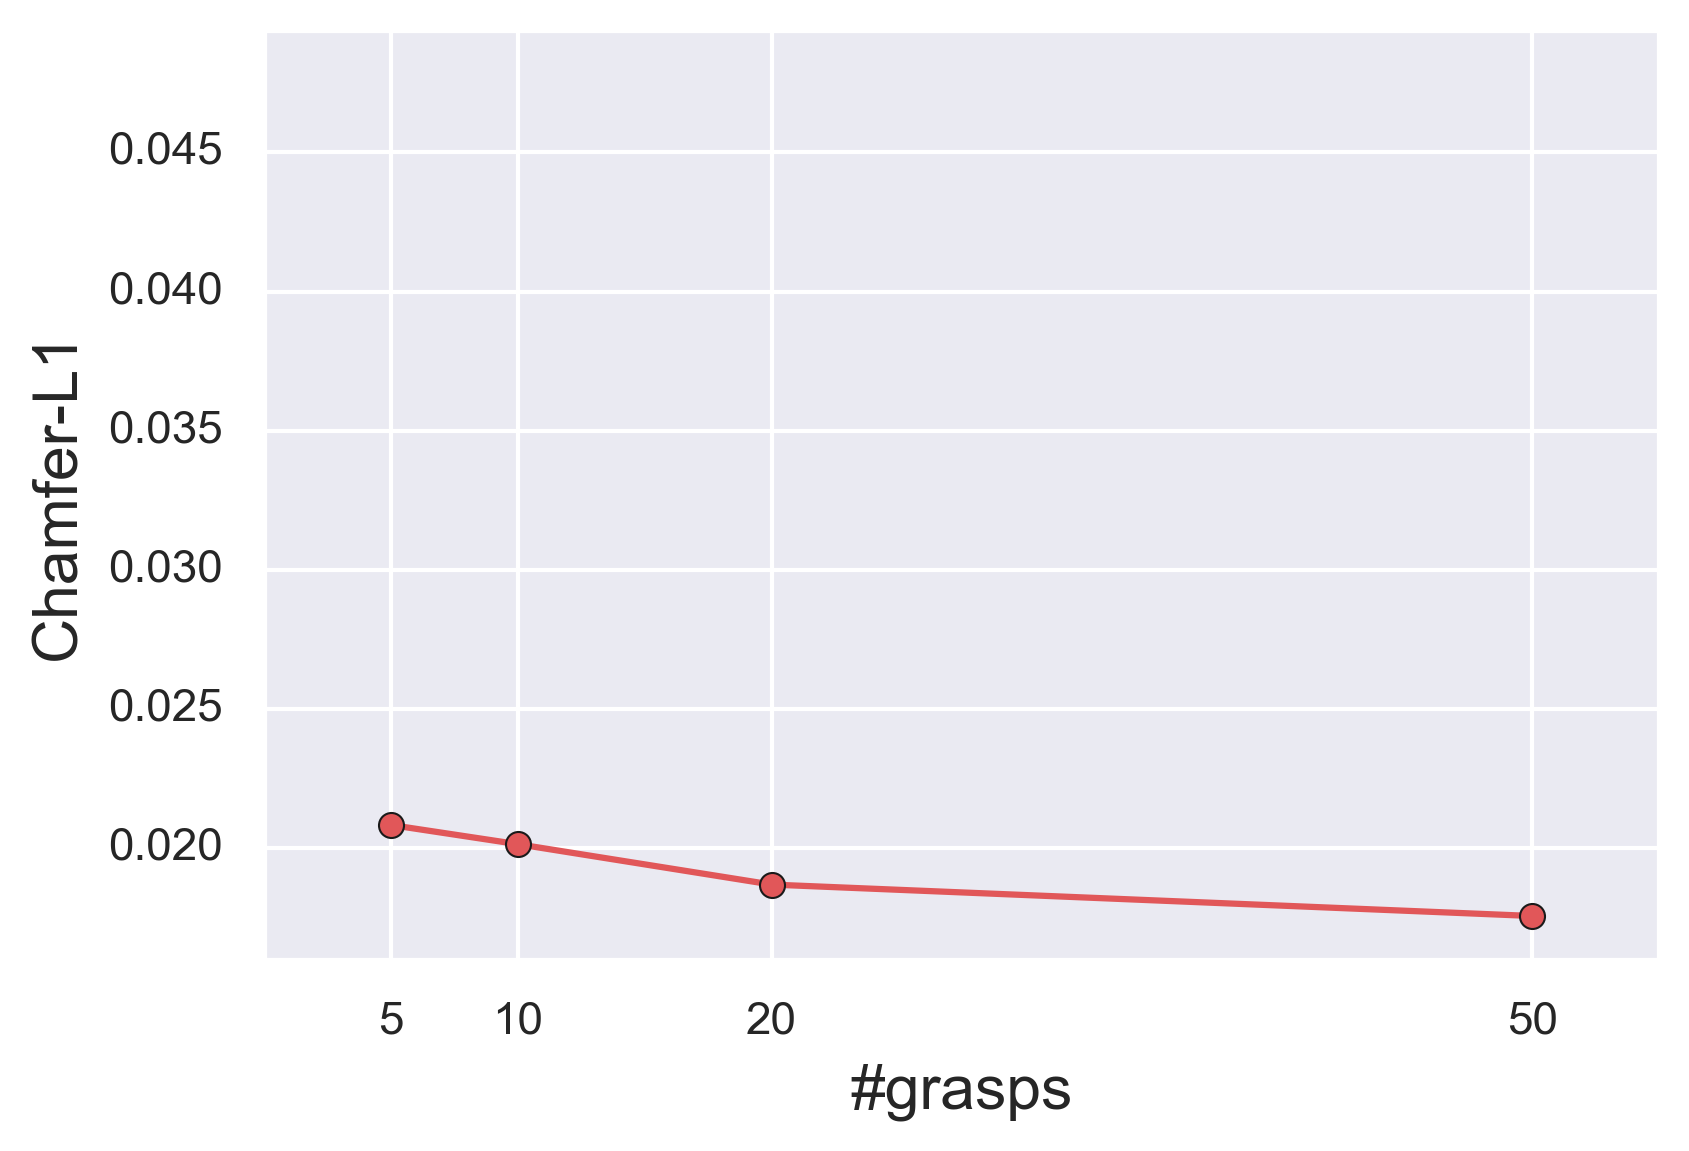

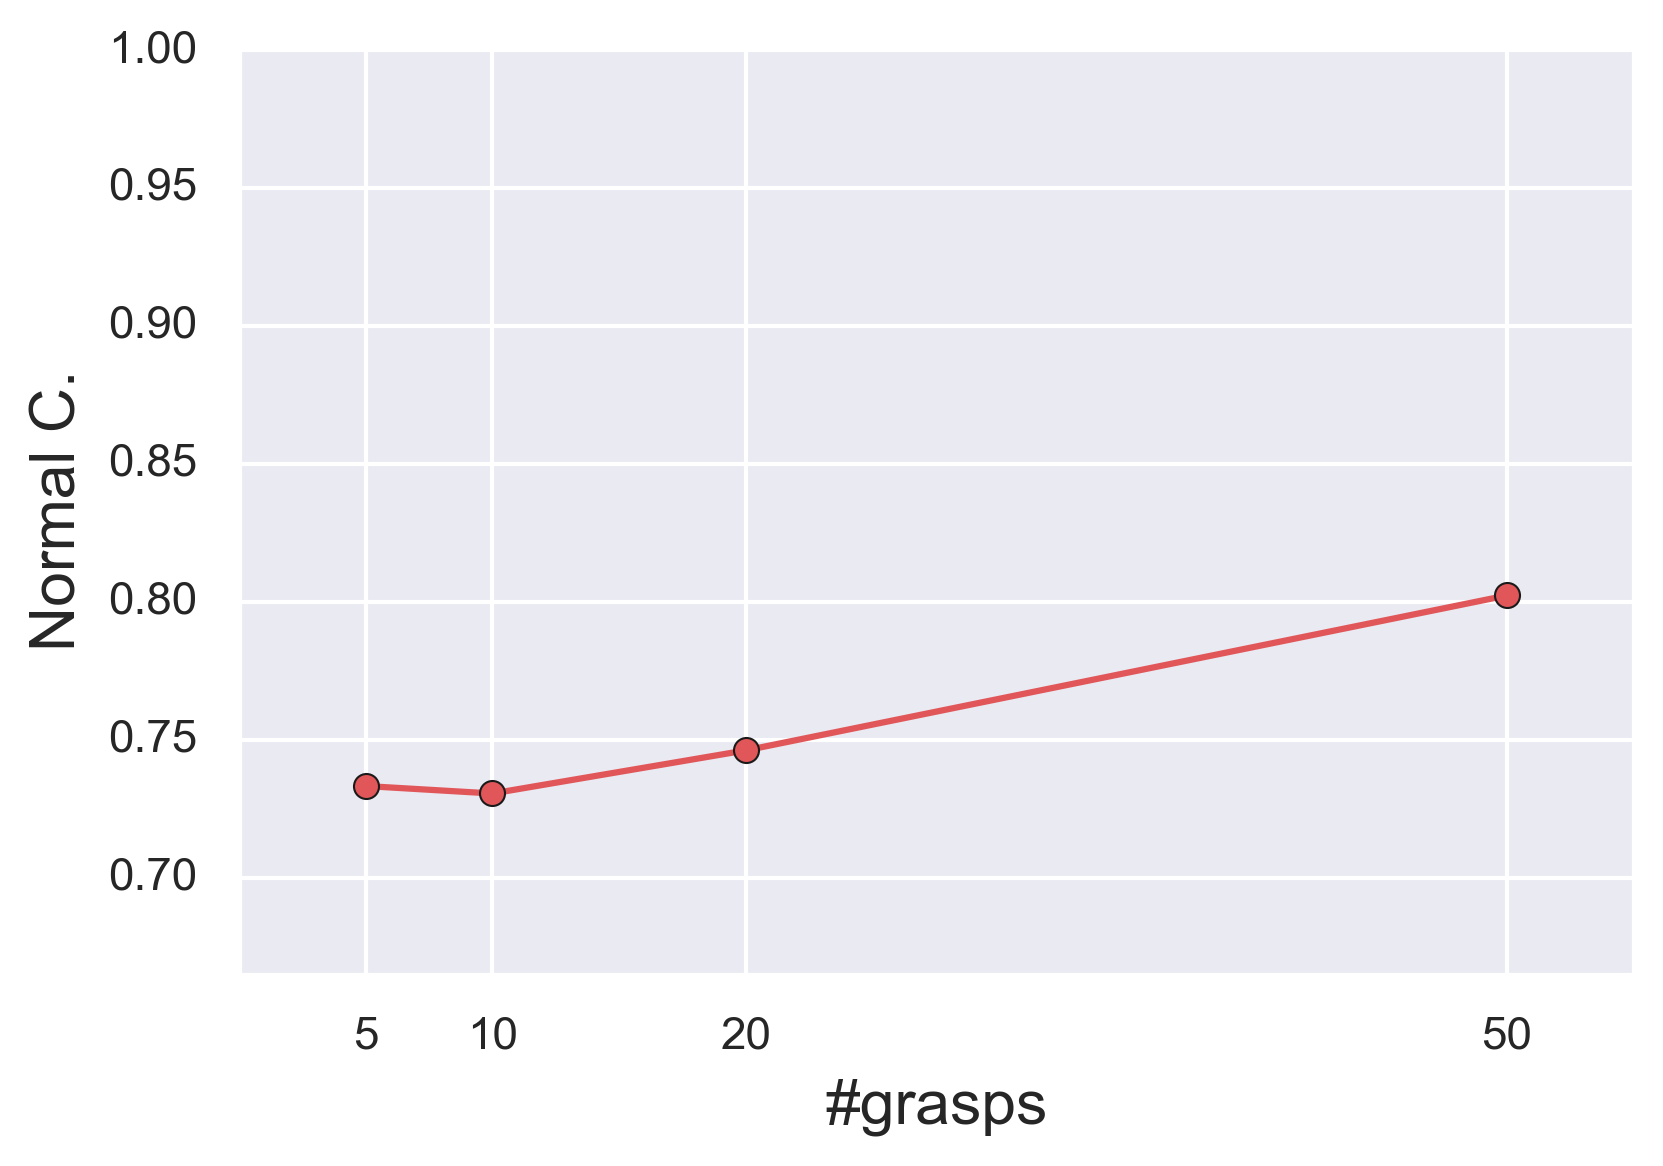

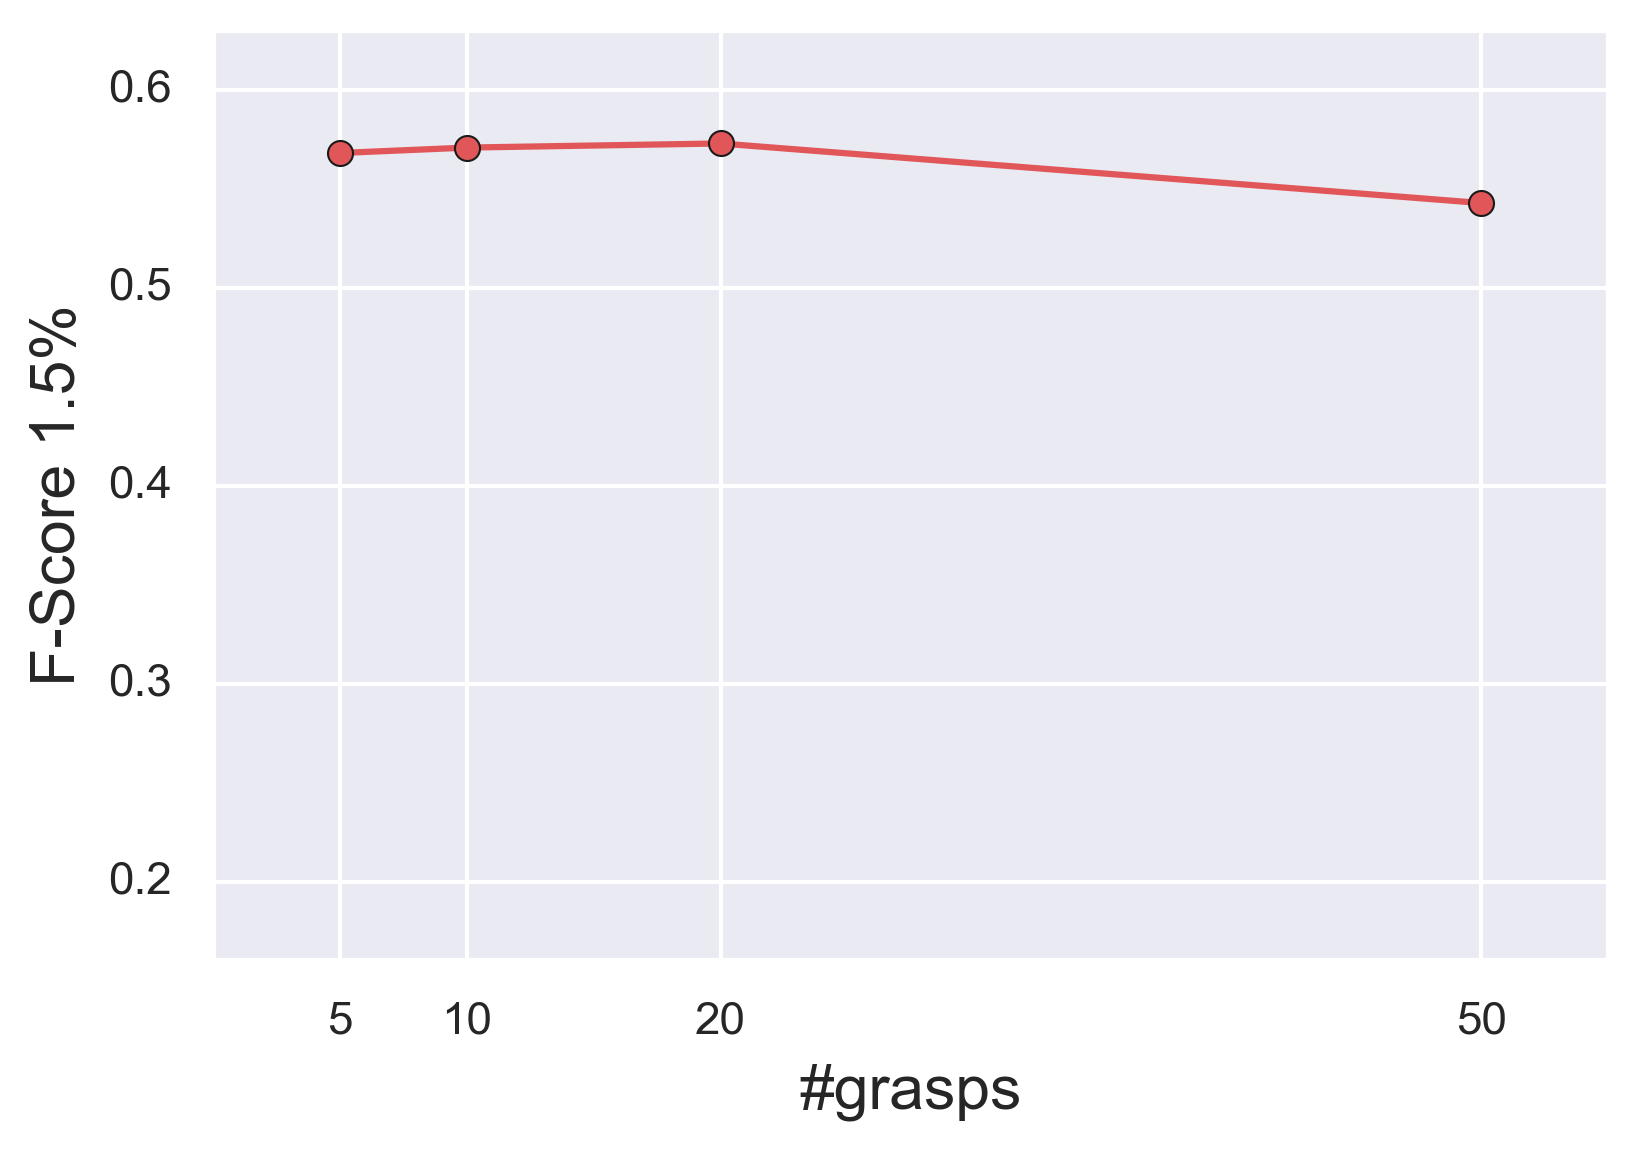

In [14]:
df = eval_all.pivot(index='#grasps', columns='experiment', values="iou (mesh)")
df = df[col_sort]
y_top = df.max().max() * 1.3
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
ax.set_ylabel("IoU", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)
#ax.set_title(metric,fontsize= 15)
fig = plt.figure()


df = eval_all.pivot(index='#grasps', columns='experiment', values="chamfer-L1 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Chamfer-L1", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all.pivot(index='#grasps', columns='experiment', values="normals completeness (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Normal C.", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all.pivot(index='#grasps', columns='experiment', values="f-score-15 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("F-Score 1.5%", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

## Vanilla

In [15]:
experiments_colors = {
    "Pretrained": '#e15759' + '99',
    "Vanilla": '#f28e2b' + 'FF',
    "Scale + Rotation": '#edc948' + '00',
    "Grasps": '#4E79A7' + '00',
    "Scale + Rotatation + Grasps": '#59a14f' + '00'
}

col_sort = ["Pretrained", "Vanilla", "Scale + Rotation", "Grasps", "Scale + Rotatation + Grasps"]

Text(0.5, 0, '#grasps')

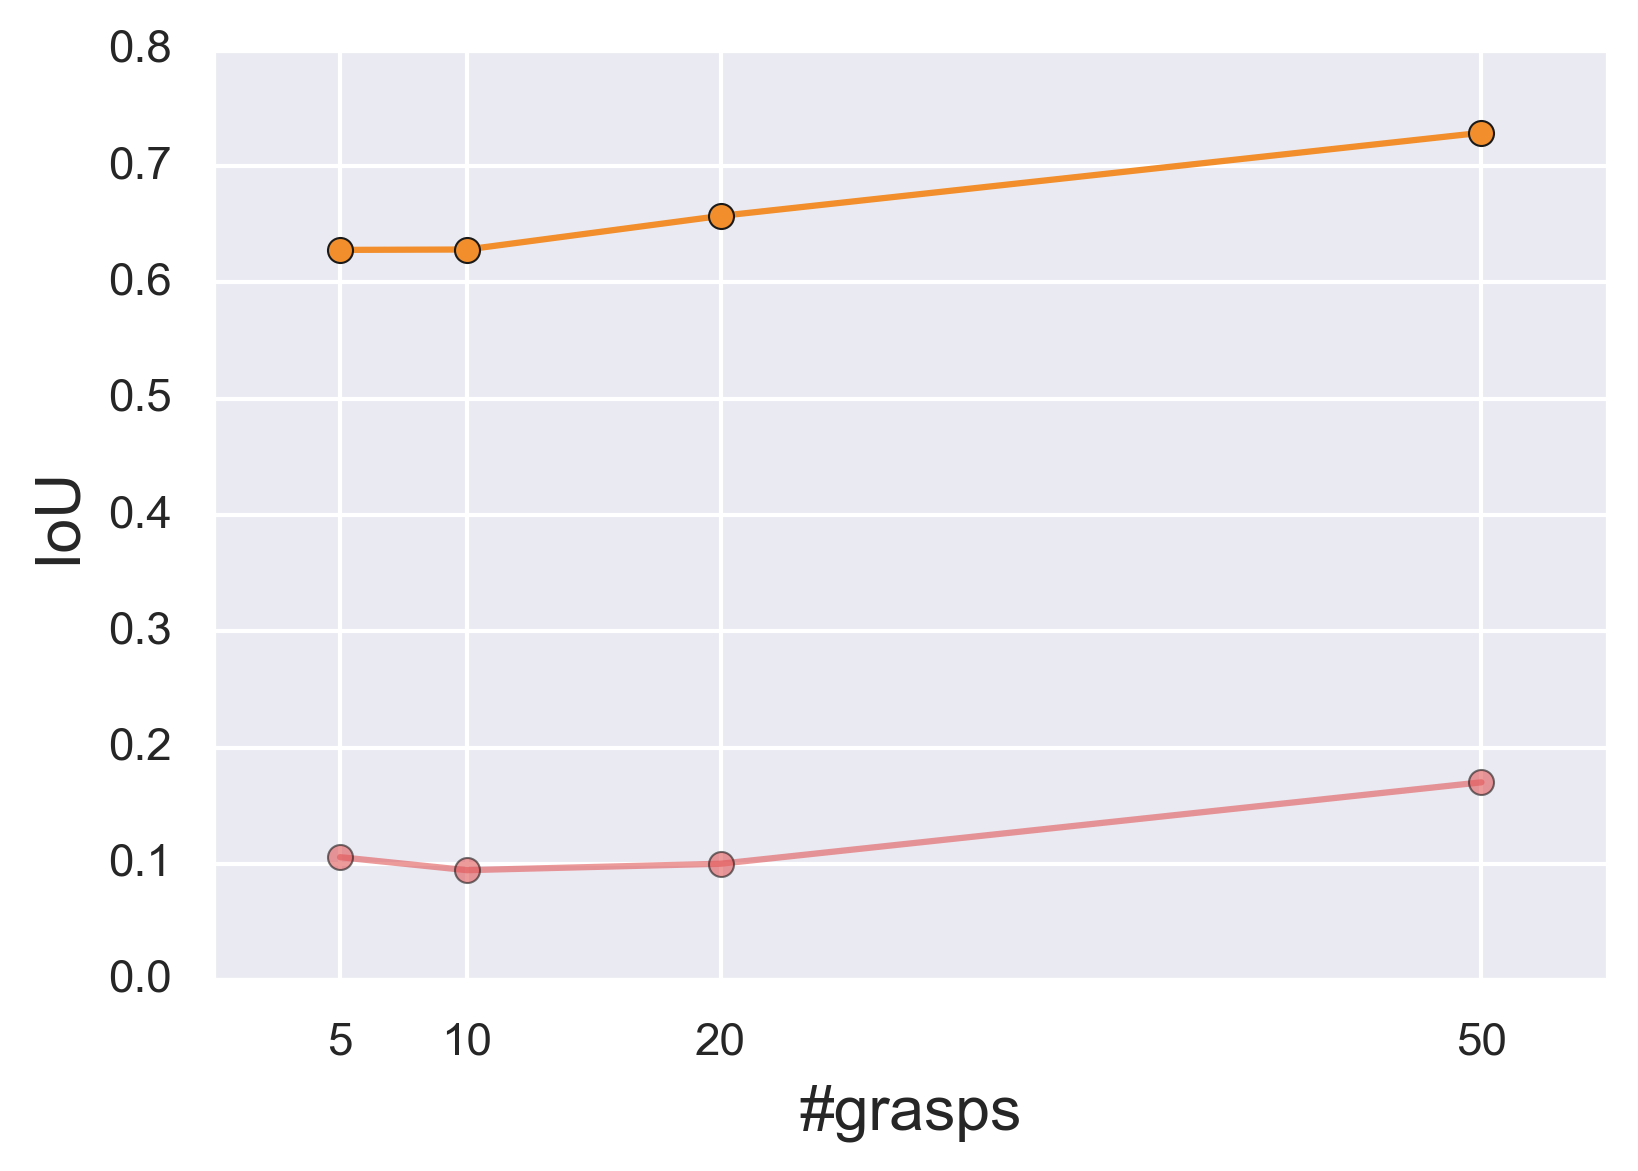

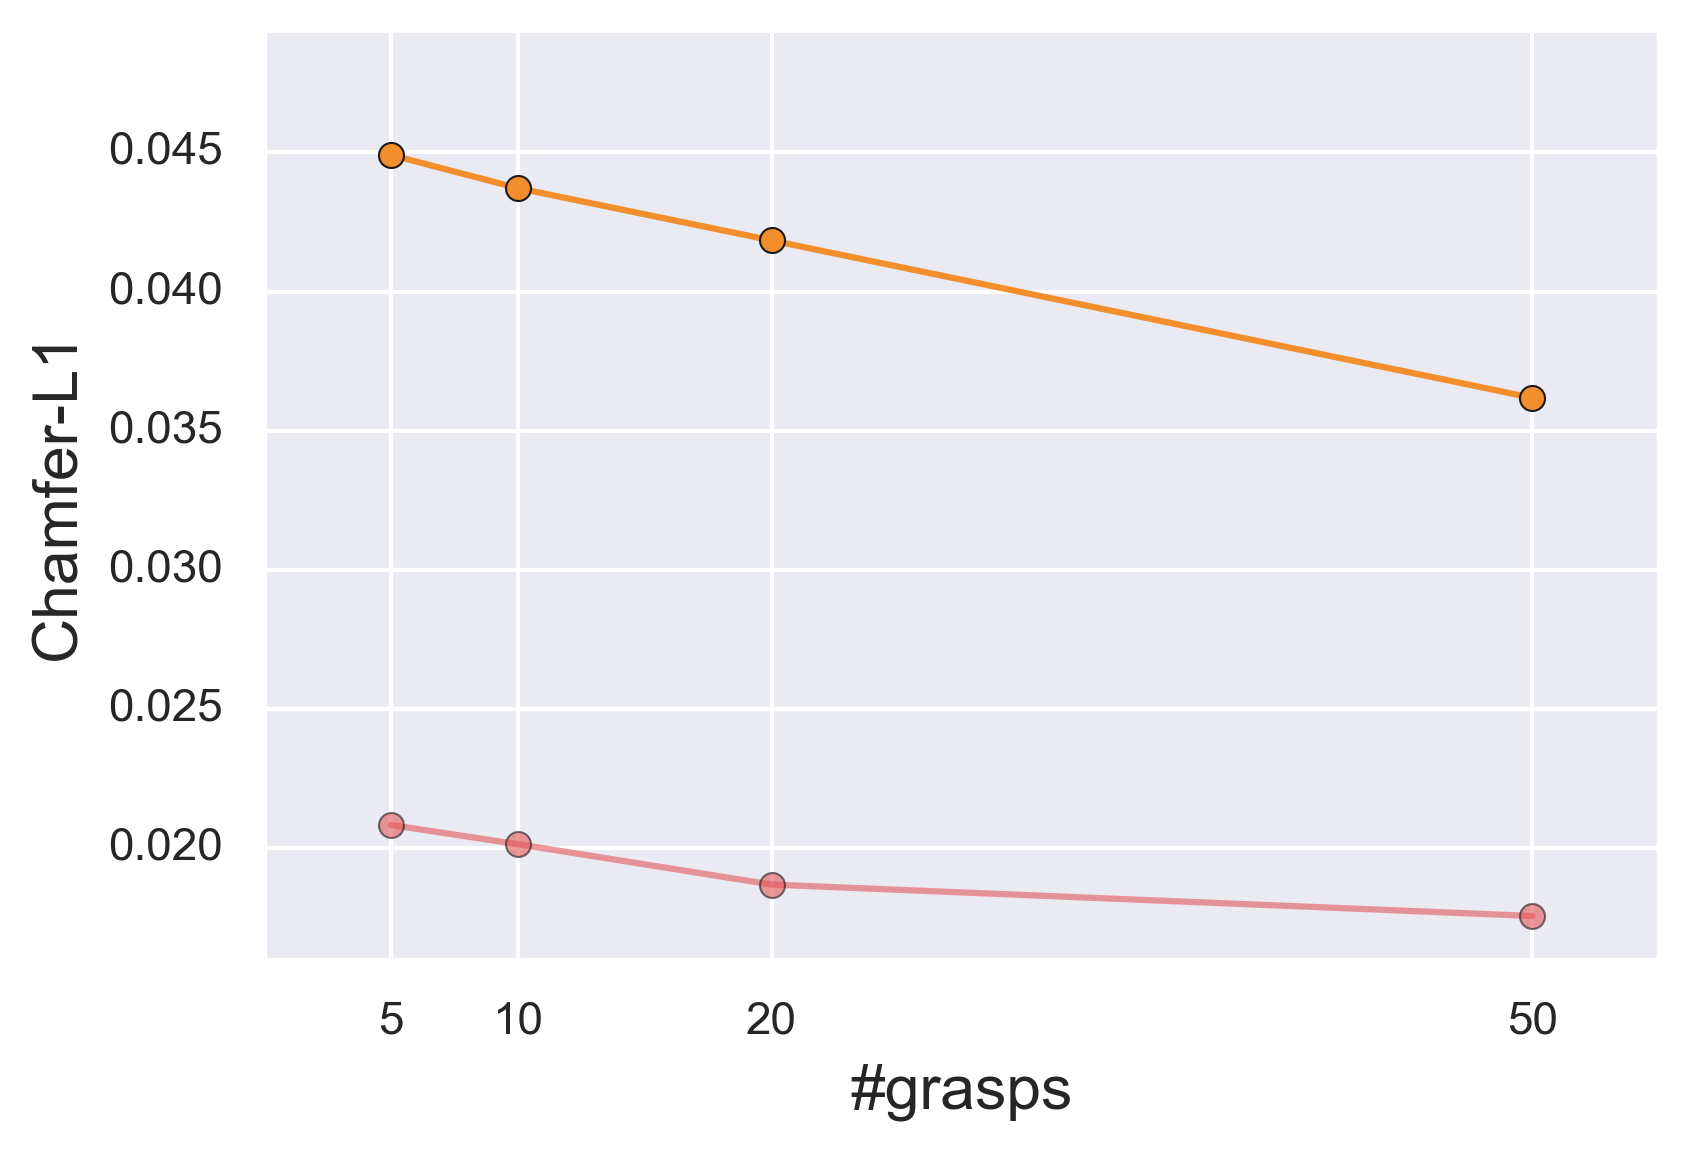

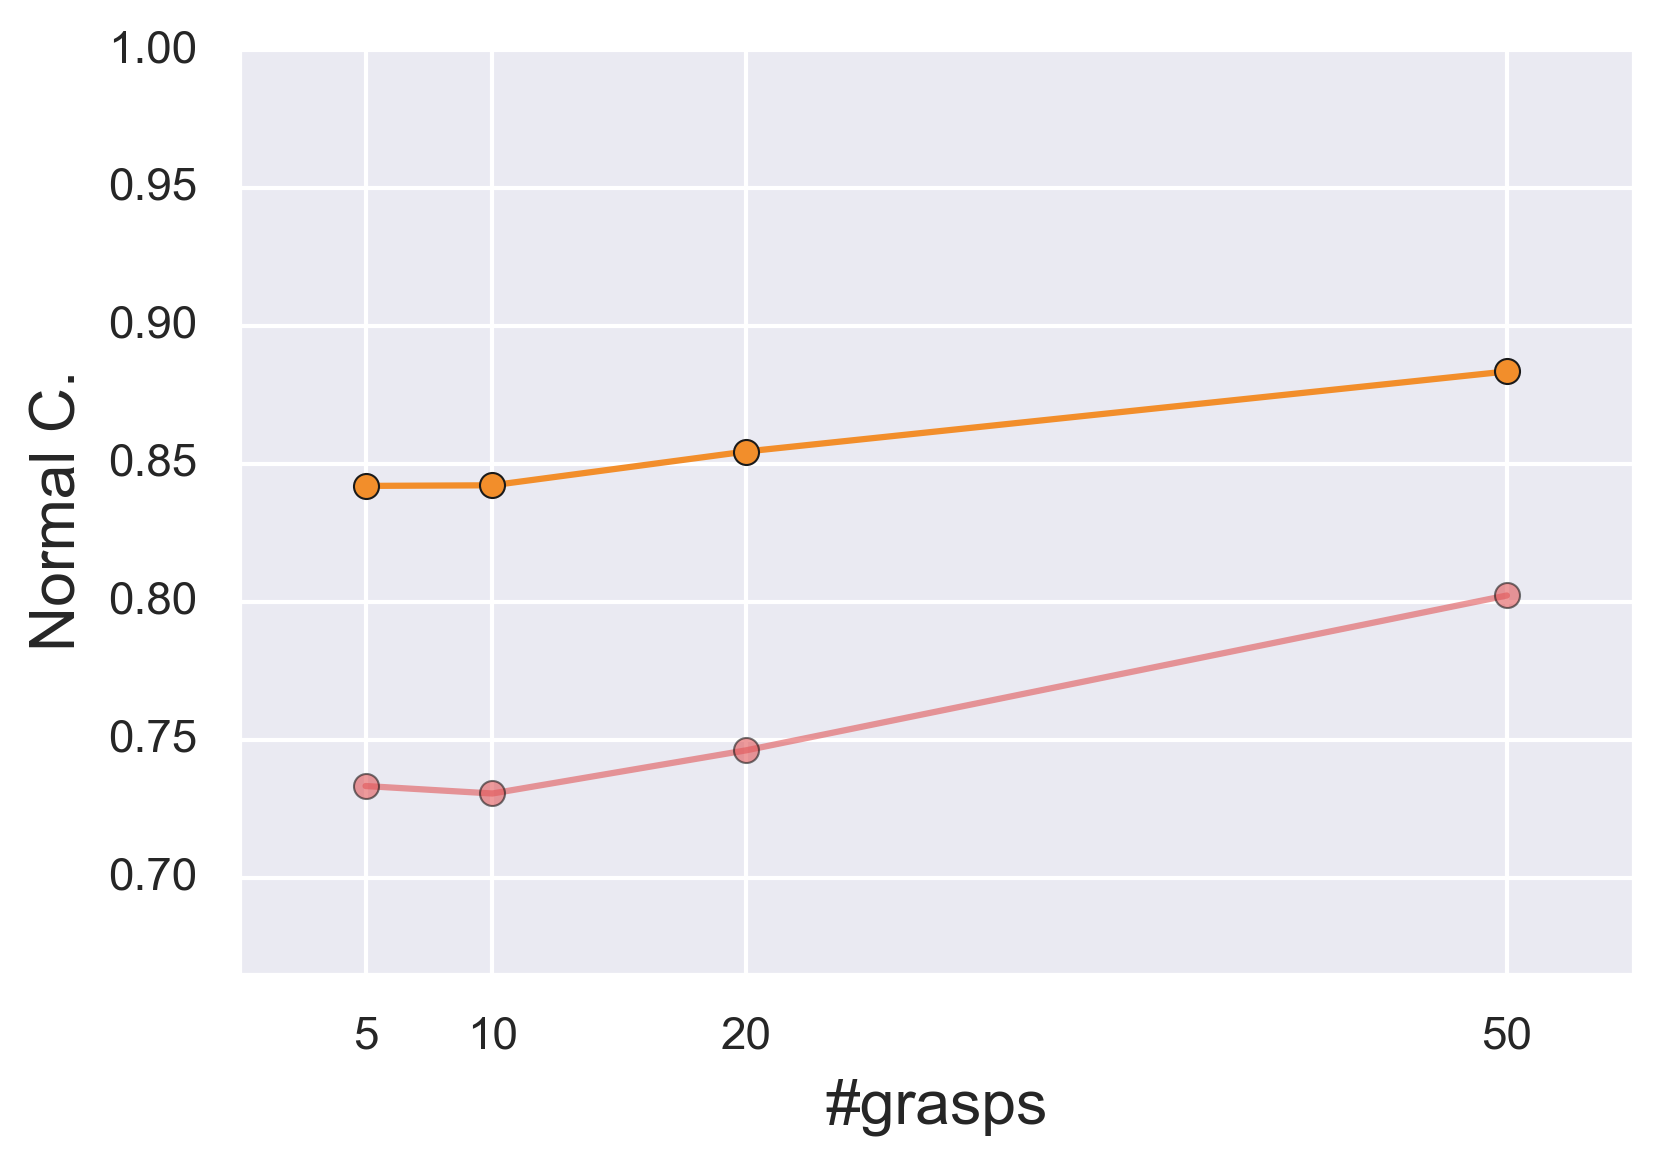

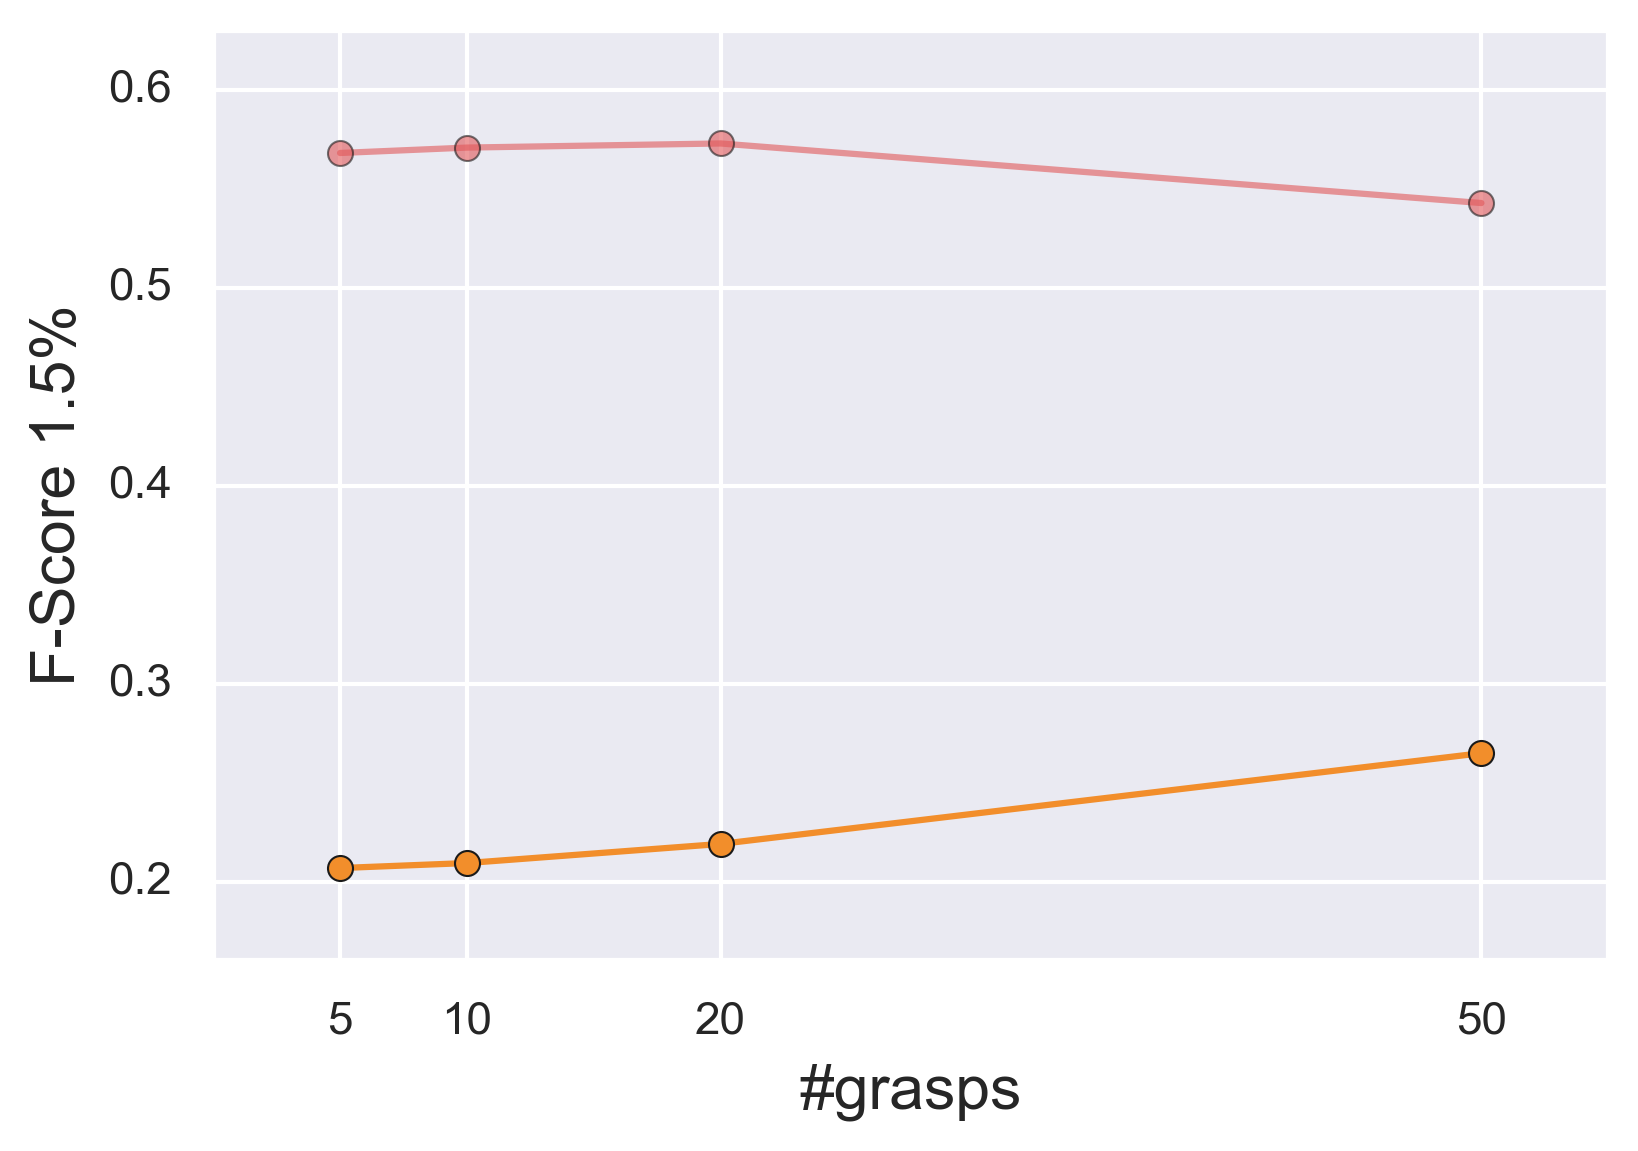

In [16]:
df = eval_all.pivot(index='#grasps', columns='experiment', values="iou (mesh)")
df = df[col_sort]
y_top = df.max().max() * 1.3
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
ax.set_ylabel("IoU", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)
#ax.set_title(metric,fontsize= 15)

df = eval_all.pivot(index='#grasps', columns='experiment', values="chamfer-L1 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Chamfer-L1", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all.pivot(index='#grasps', columns='experiment', values="normals completeness (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Normal C.", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all.pivot(index='#grasps', columns='experiment', values="f-score-15 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("F-Score 1.5%", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

## Scale + Rotation

In [17]:
experiments_colors = {
    "Vanilla": '#f28e2b' + '99',
    "Scale + Rotation": '#edc948' + 'FF',
    "Grasps": '#4E79A7' + '00',
    "Scale + Rotatation + Grasps": '#59a14f' + '00'
}

col_sort = ["Vanilla", "Scale + Rotation", "Grasps", "Scale + Rotatation + Grasps"]

Text(0.5, 0, '#grasps')

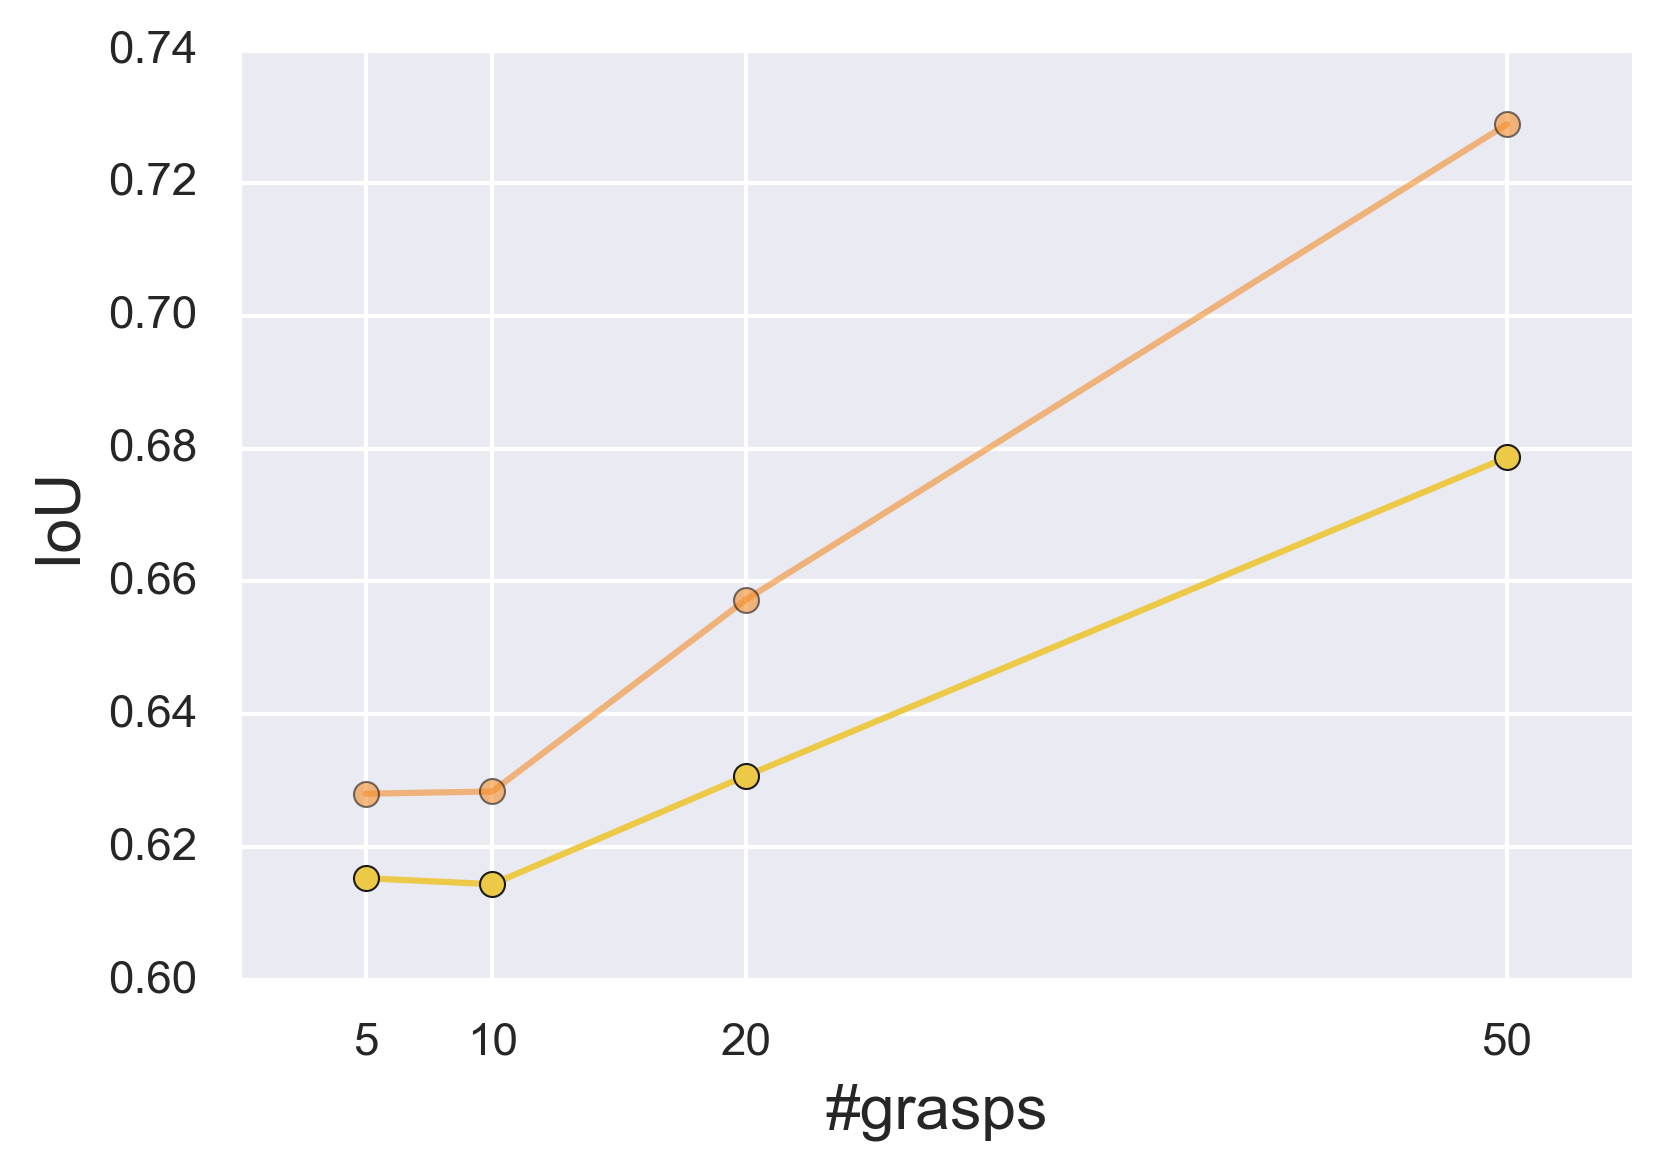

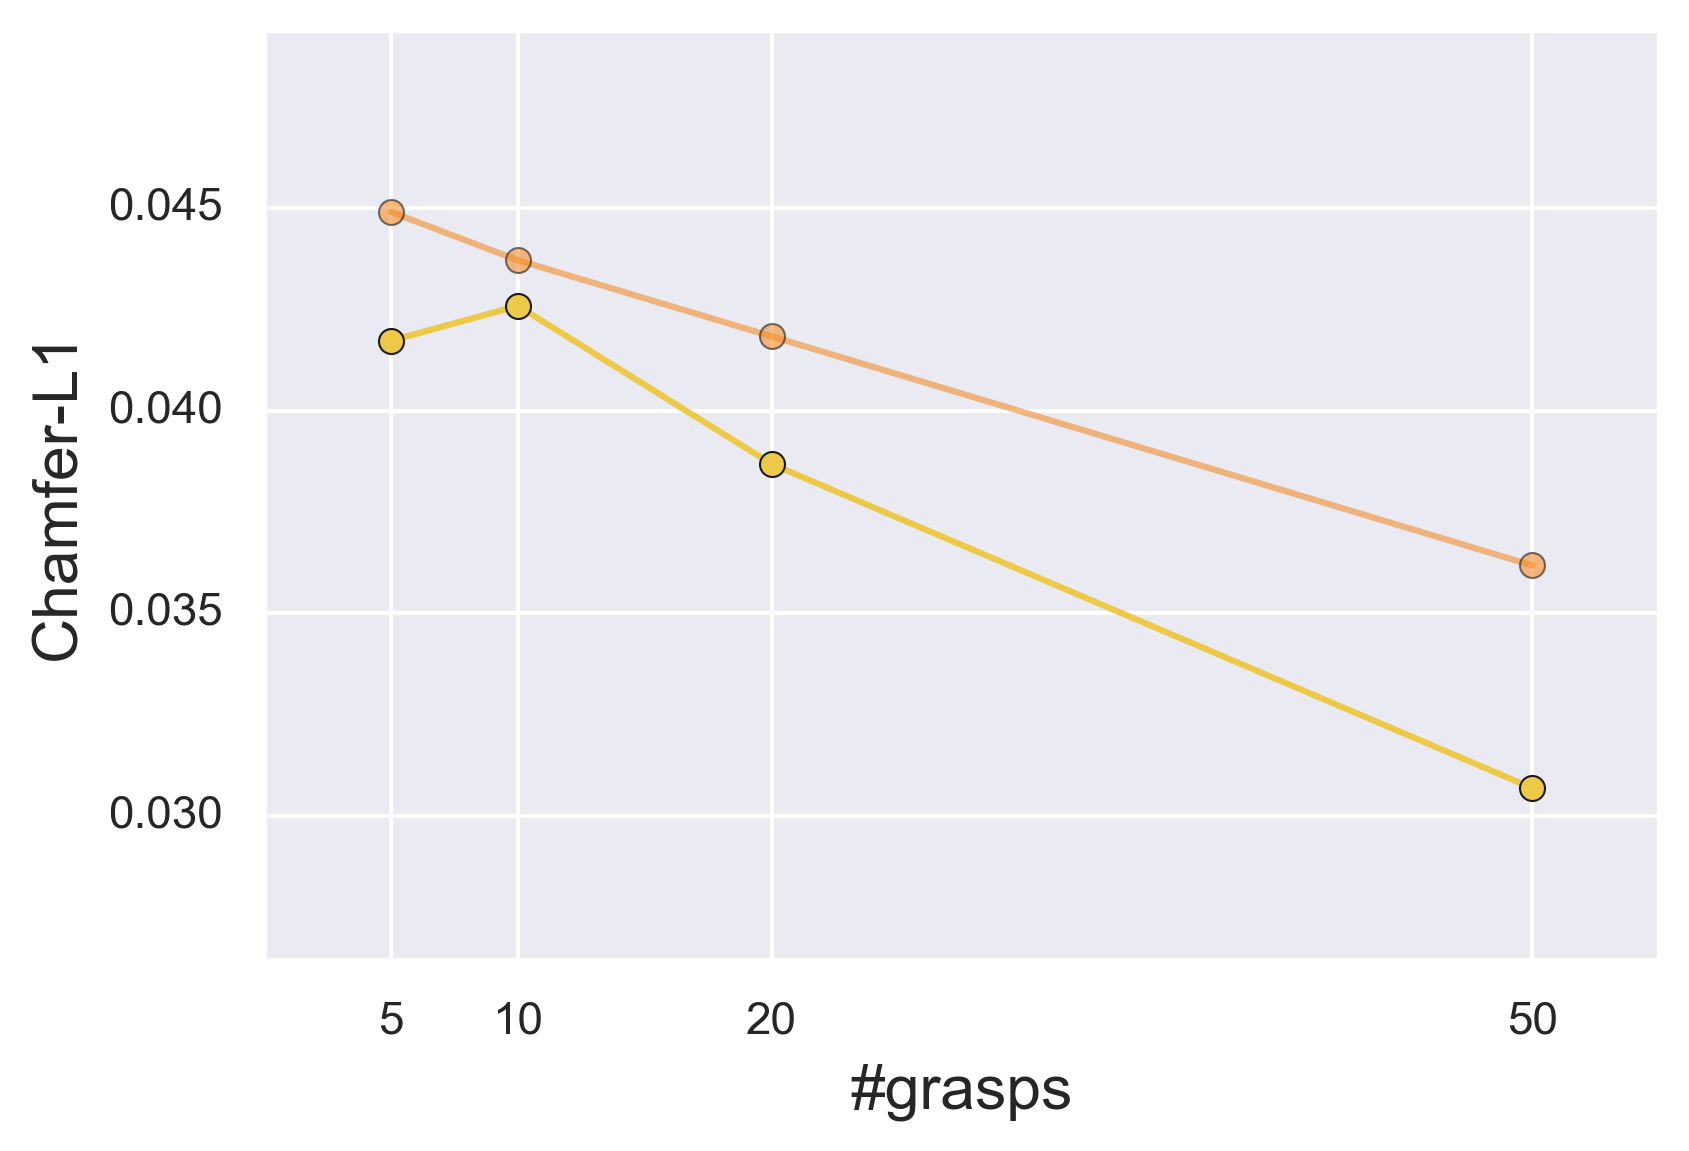

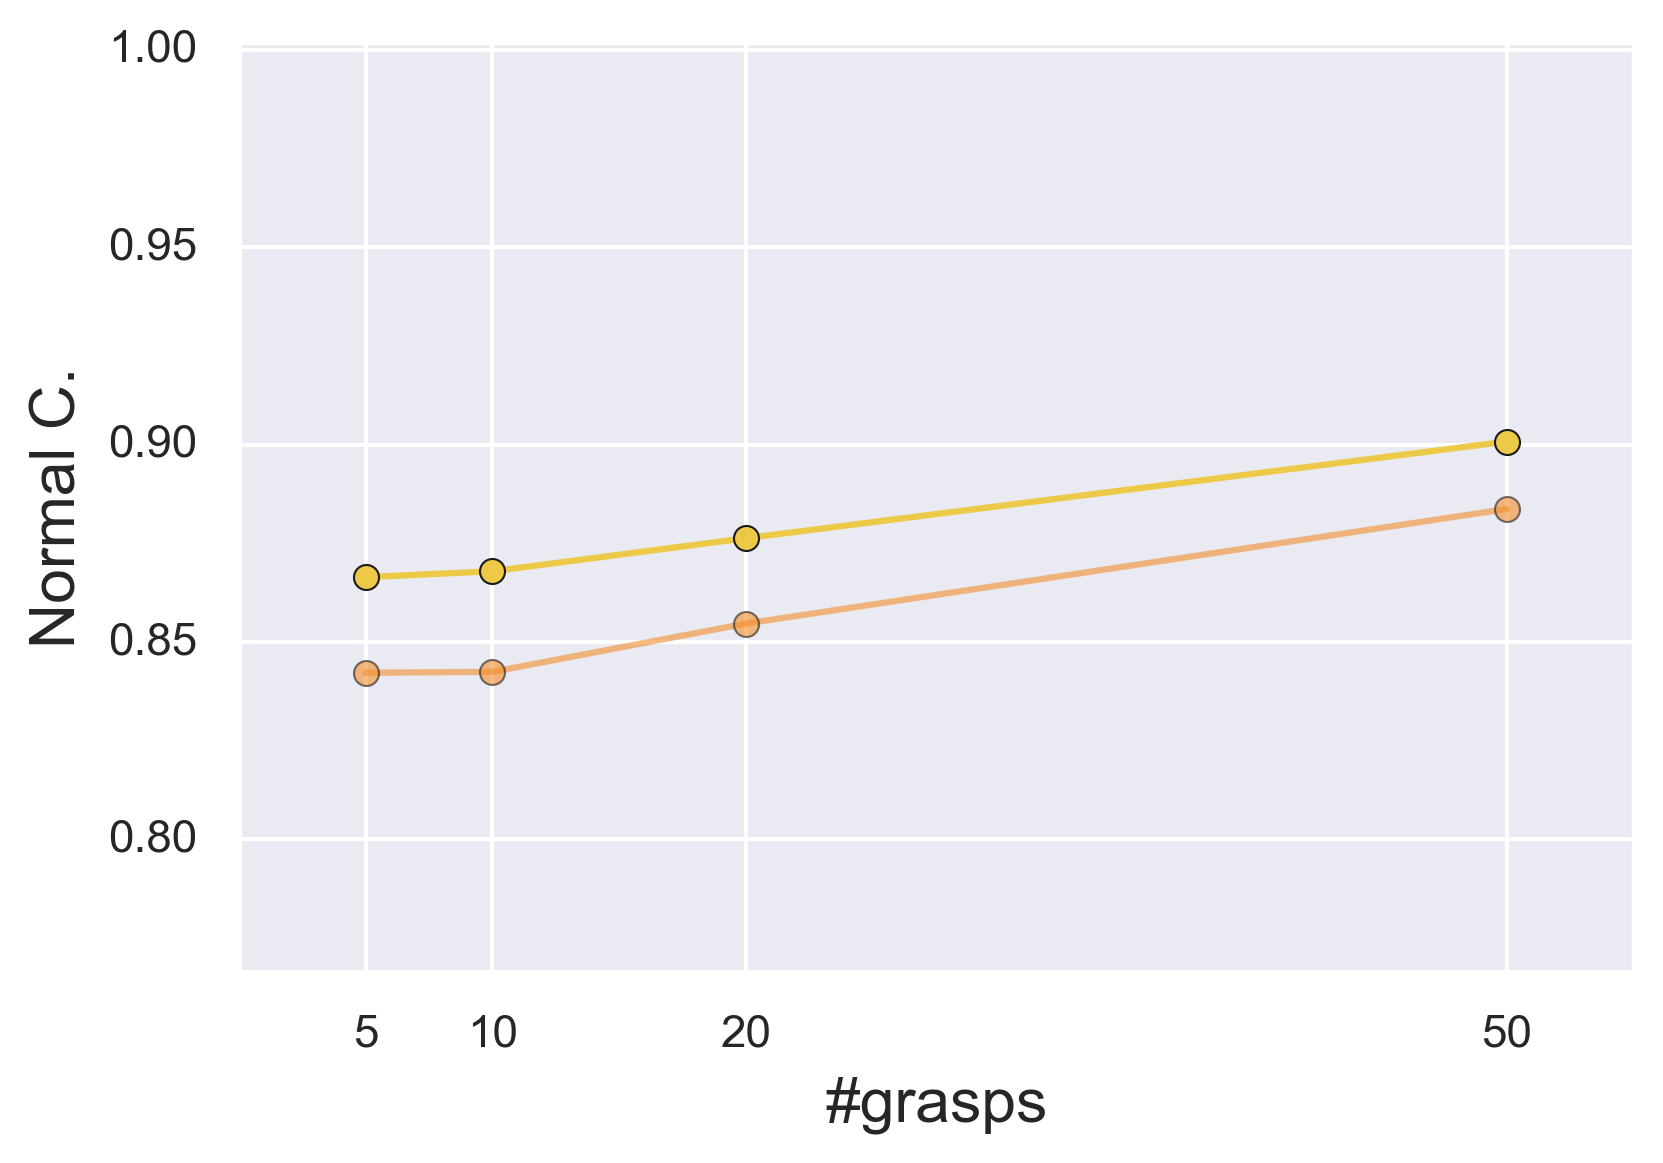

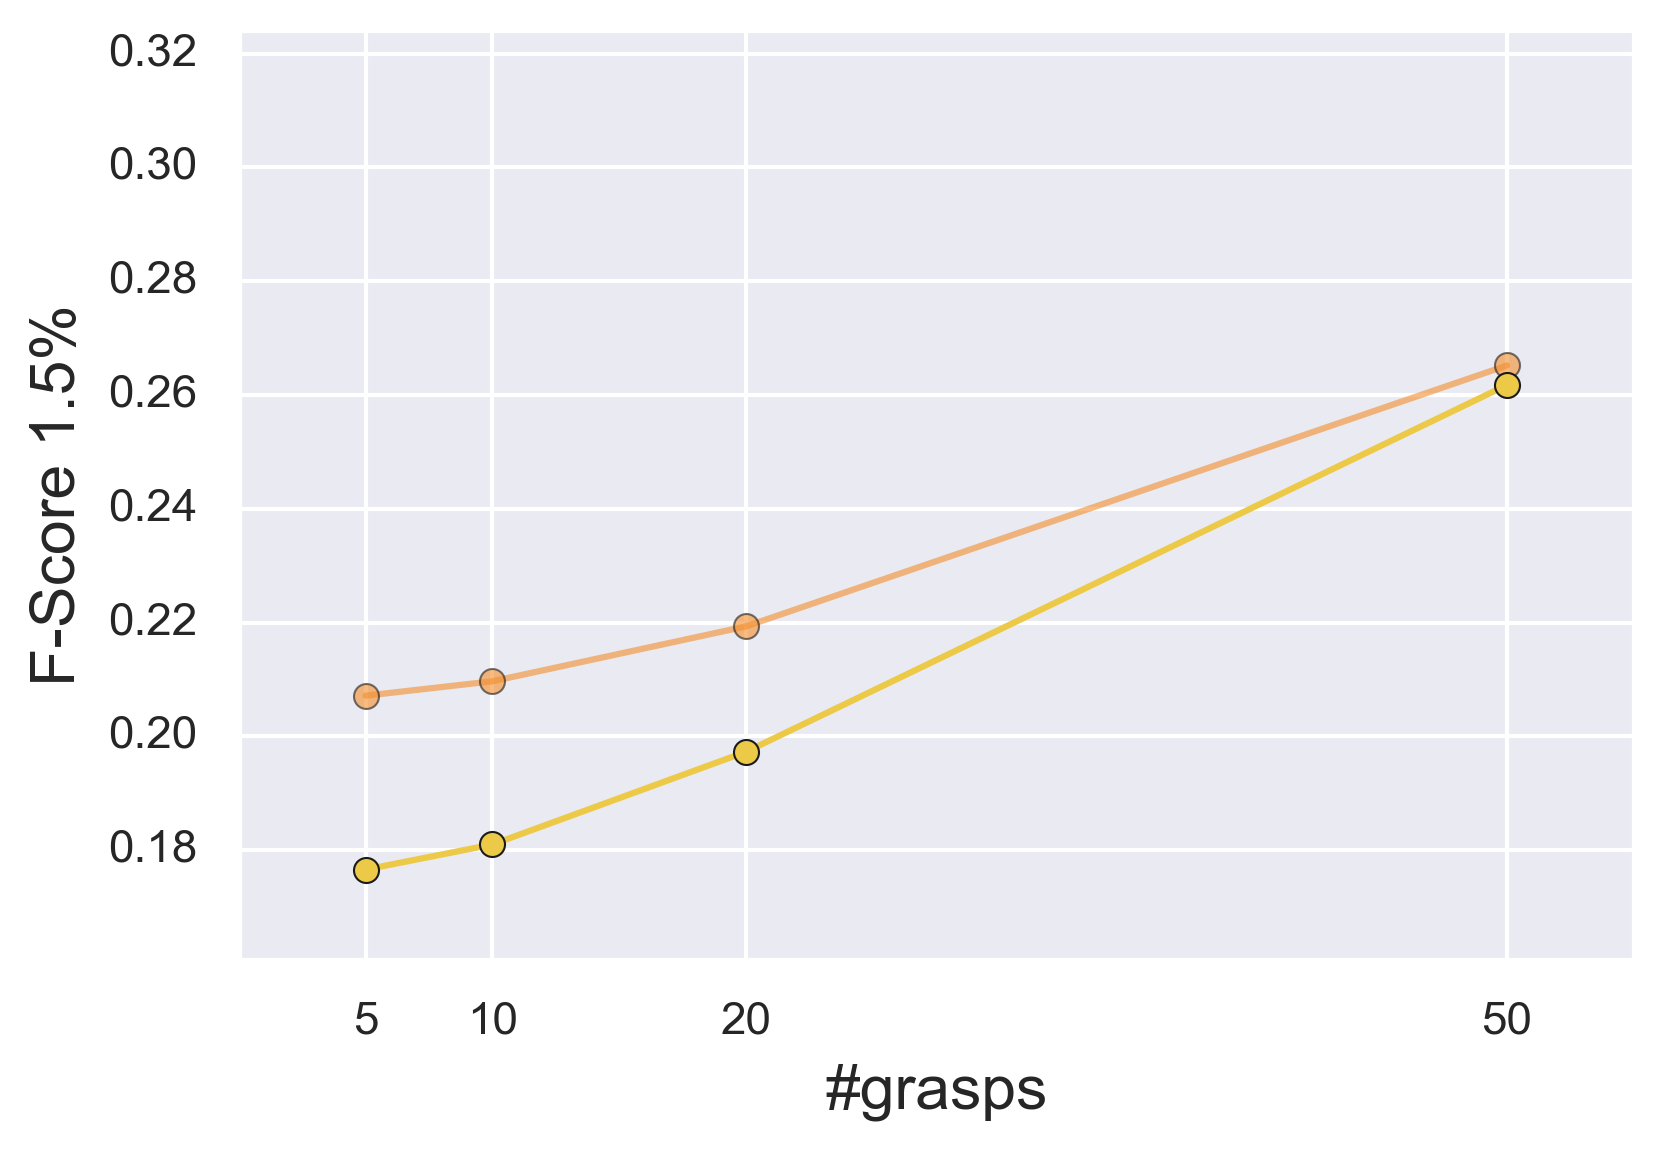

In [18]:
df = eval_all.pivot(index='#grasps', columns='experiment', values="iou (mesh)")
df = df[col_sort]
y_top = df.max().max() * 1.3
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
ax.set_ylabel("IoU", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)
#ax.set_title(metric,fontsize= 15)

df = eval_all.pivot(index='#grasps', columns='experiment', values="chamfer-L1 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Chamfer-L1", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all.pivot(index='#grasps', columns='experiment', values="normals completeness (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Normal C.", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all.pivot(index='#grasps', columns='experiment', values="f-score-15 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("F-Score 1.5%", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

## Grasps

In [19]:
experiments_colors = {
    "Vanilla": '#f28e2b' + '99',
    "Scale + Rotation": '#edc948' + '99',
    "Grasps": '#4E79A7' + 'FF',
    "Scale + Rotatation + Grasps": '#59a14f' + '00'
}

col_sort = ["Vanilla", "Scale + Rotation", "Grasps", "Scale + Rotatation + Grasps"]

Text(0.5, 0, '#grasps')

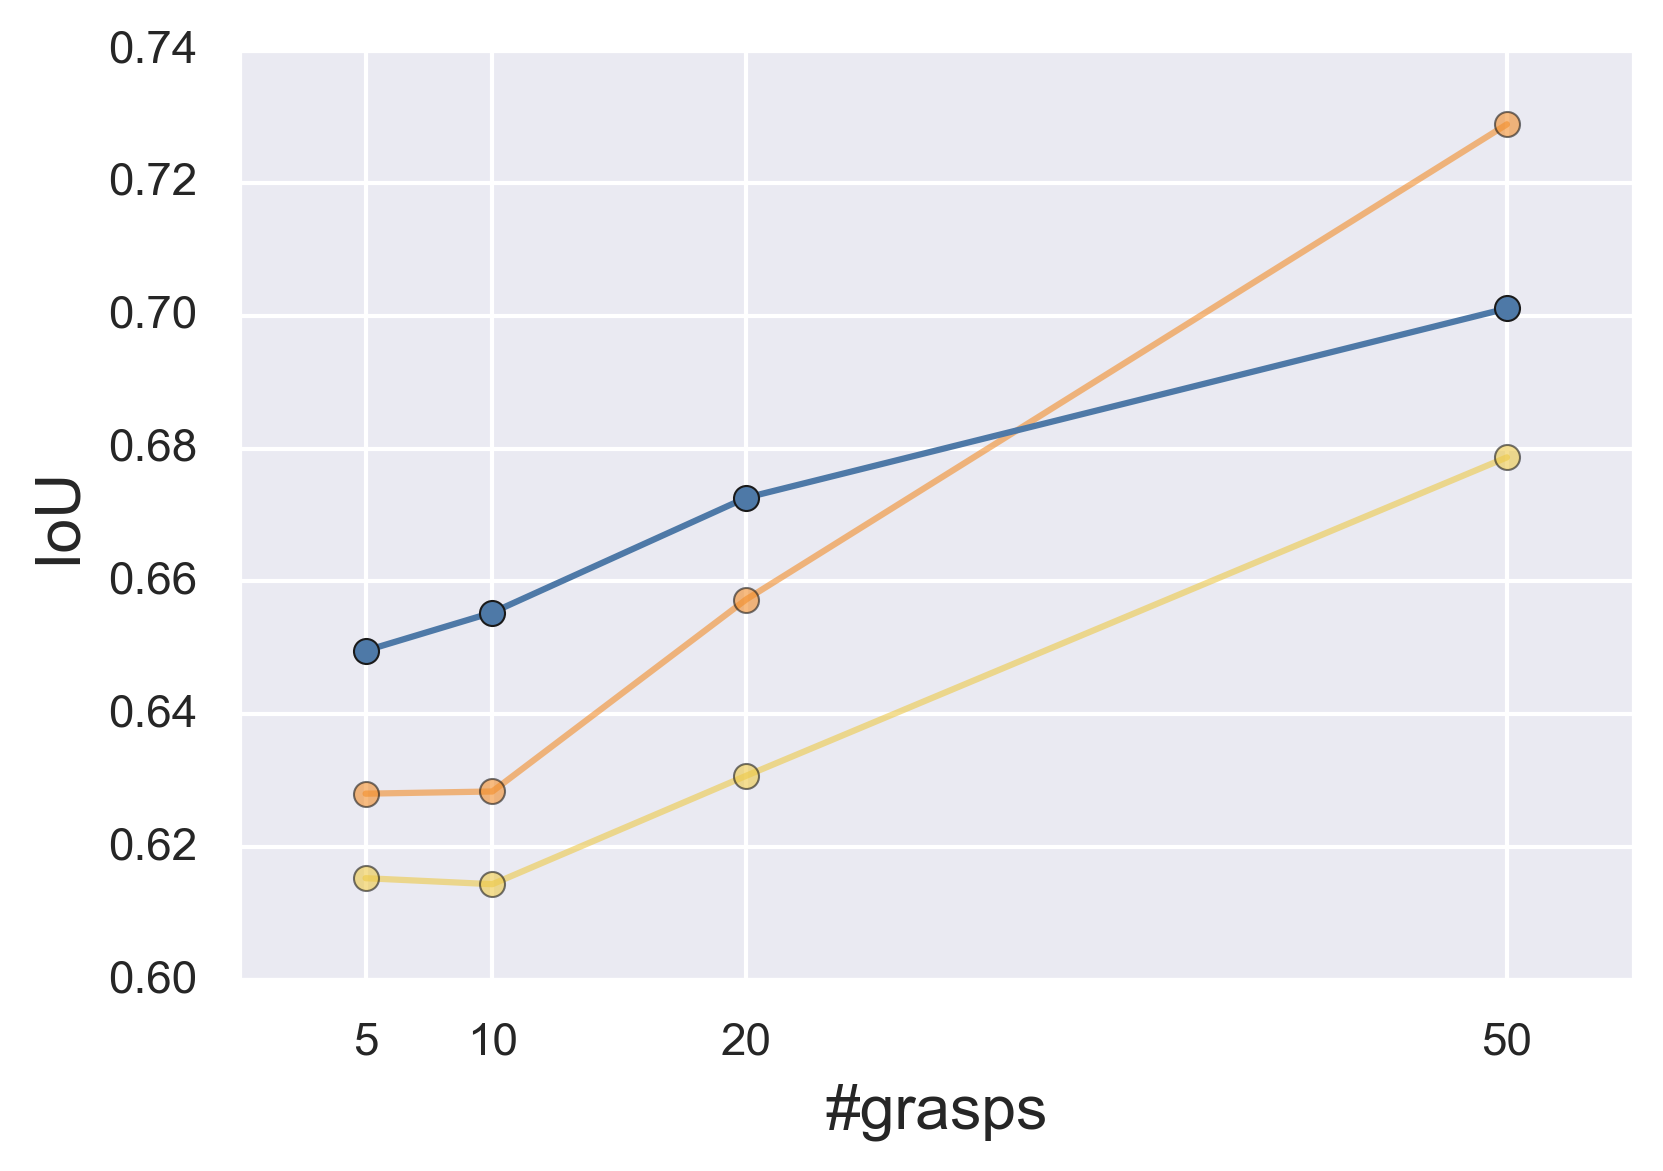

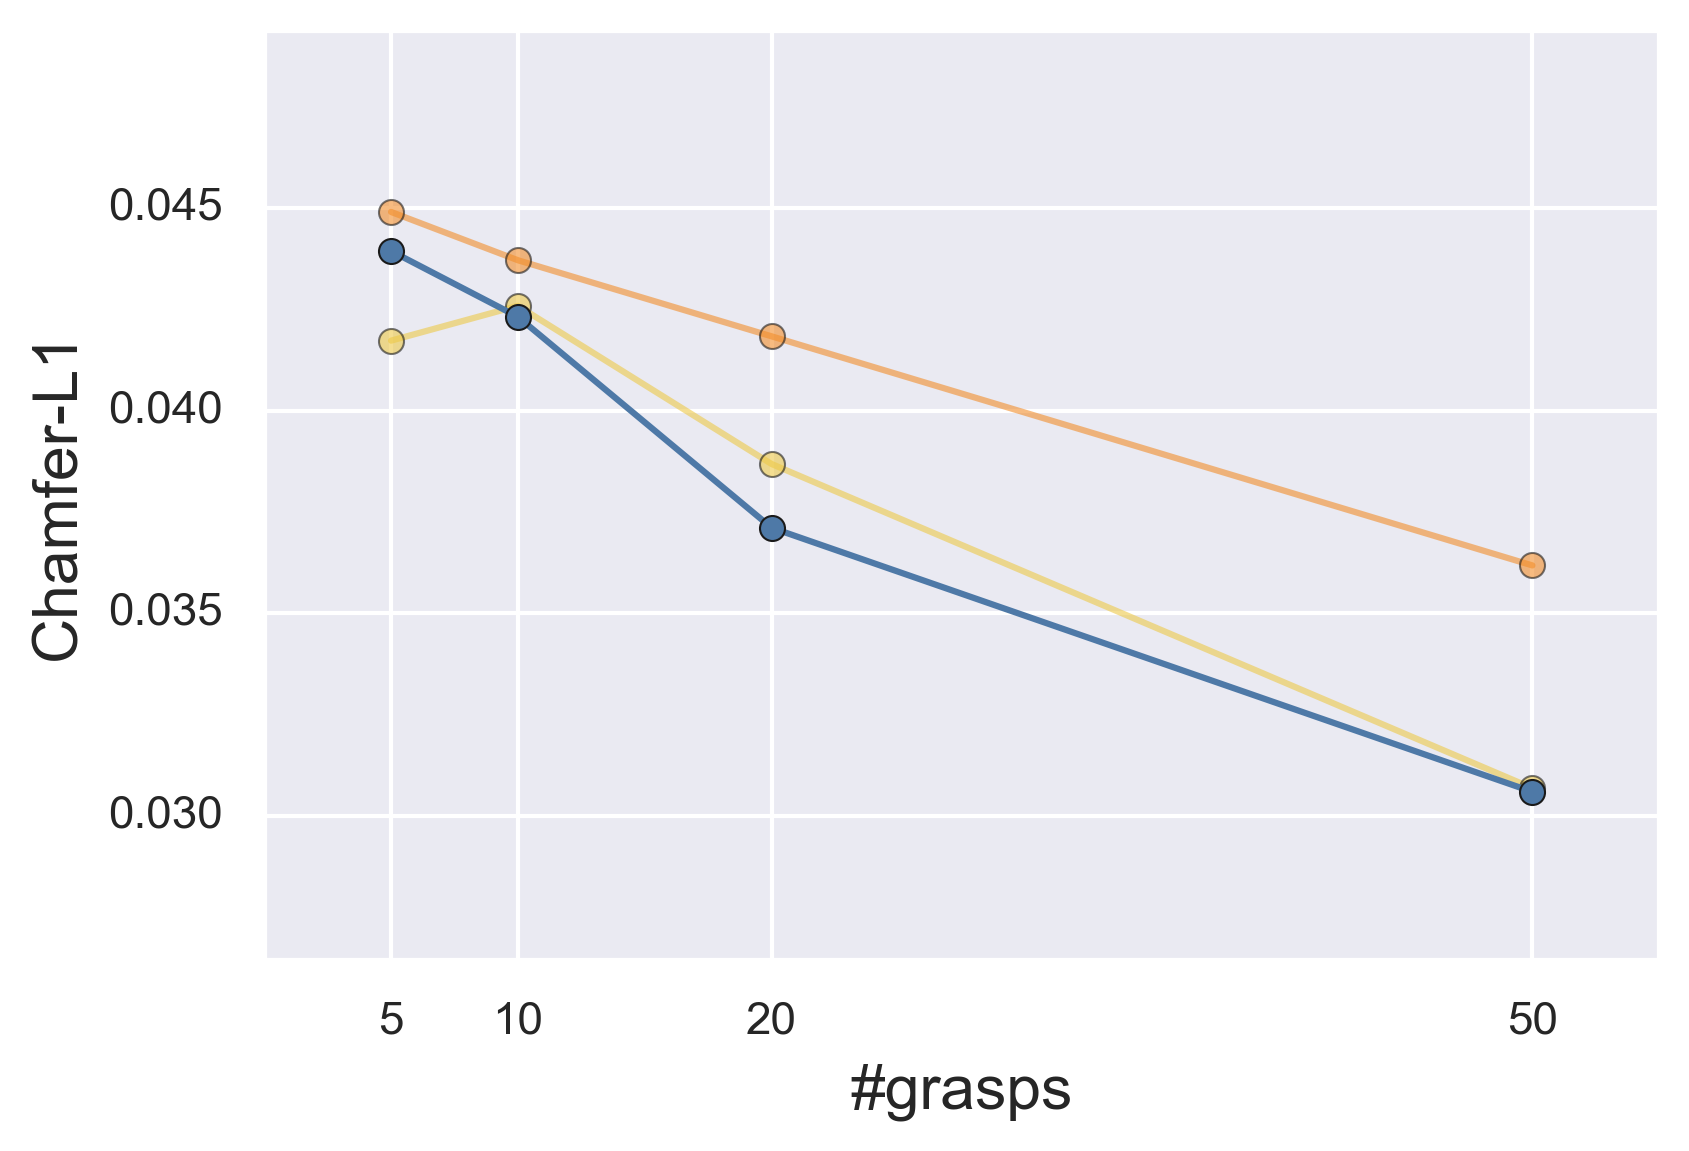

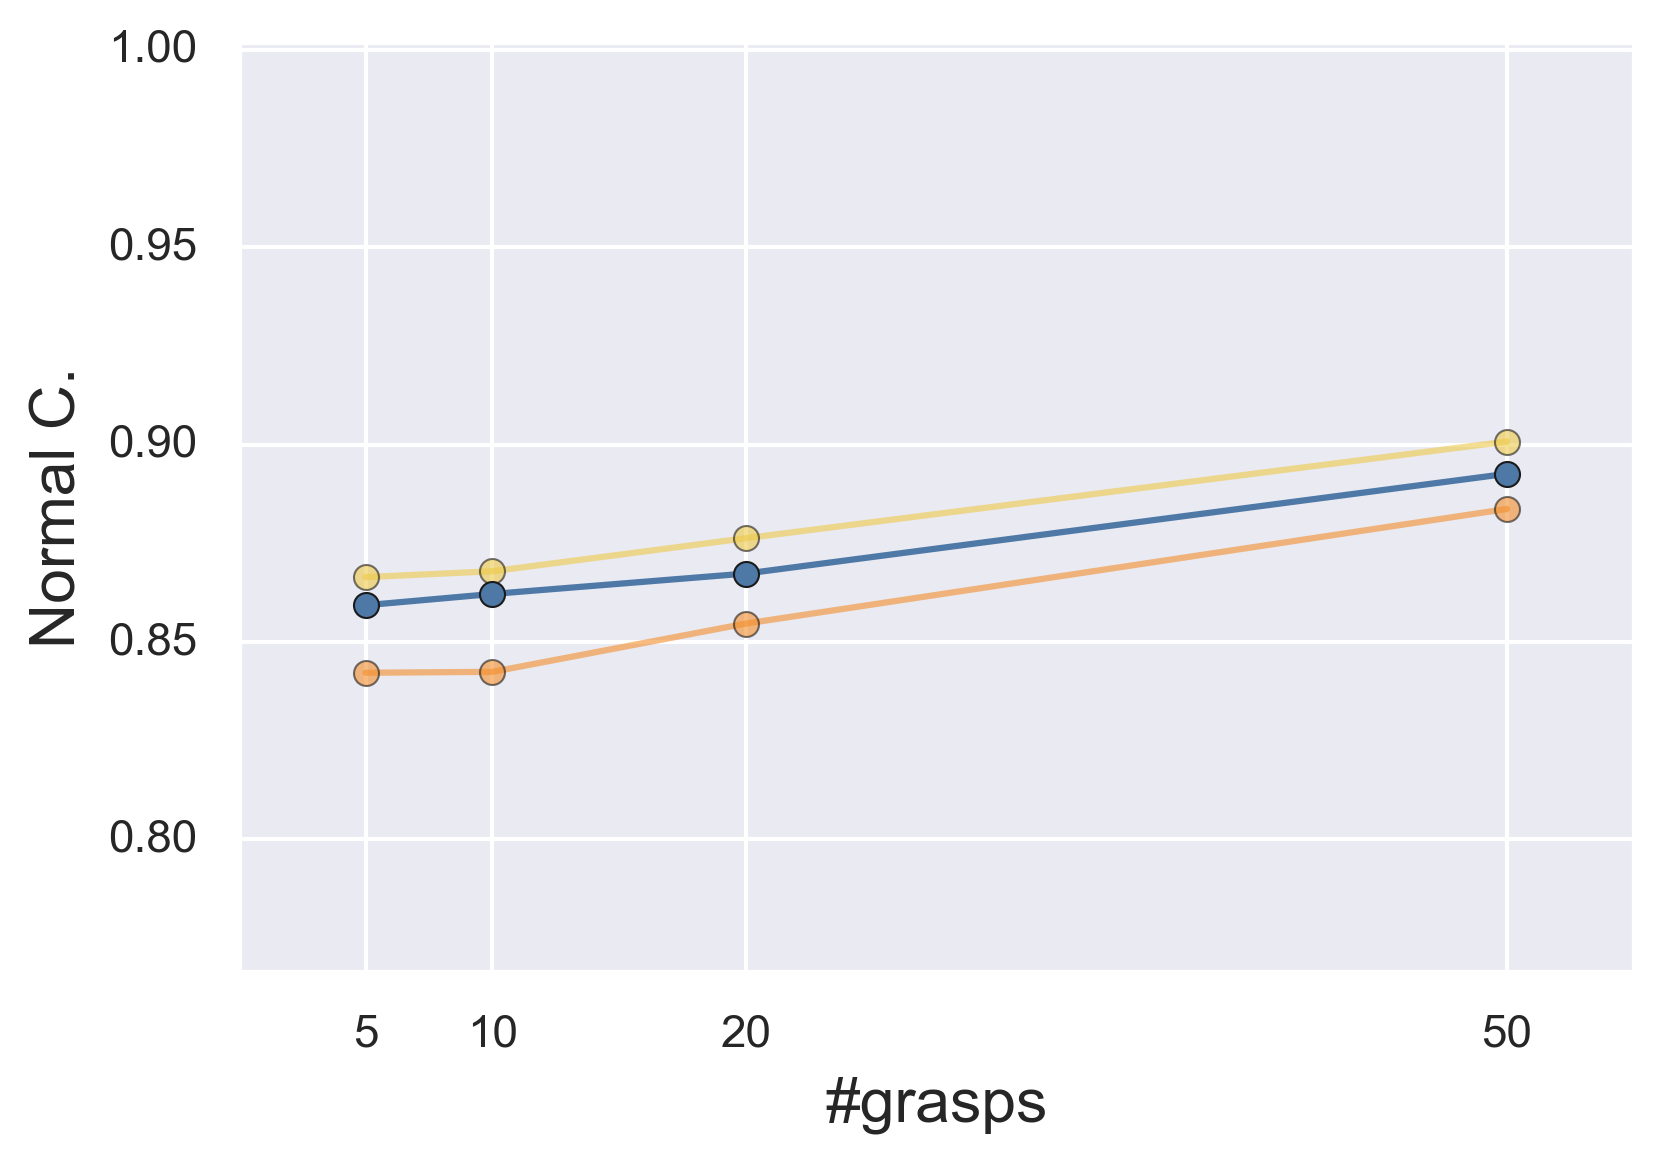

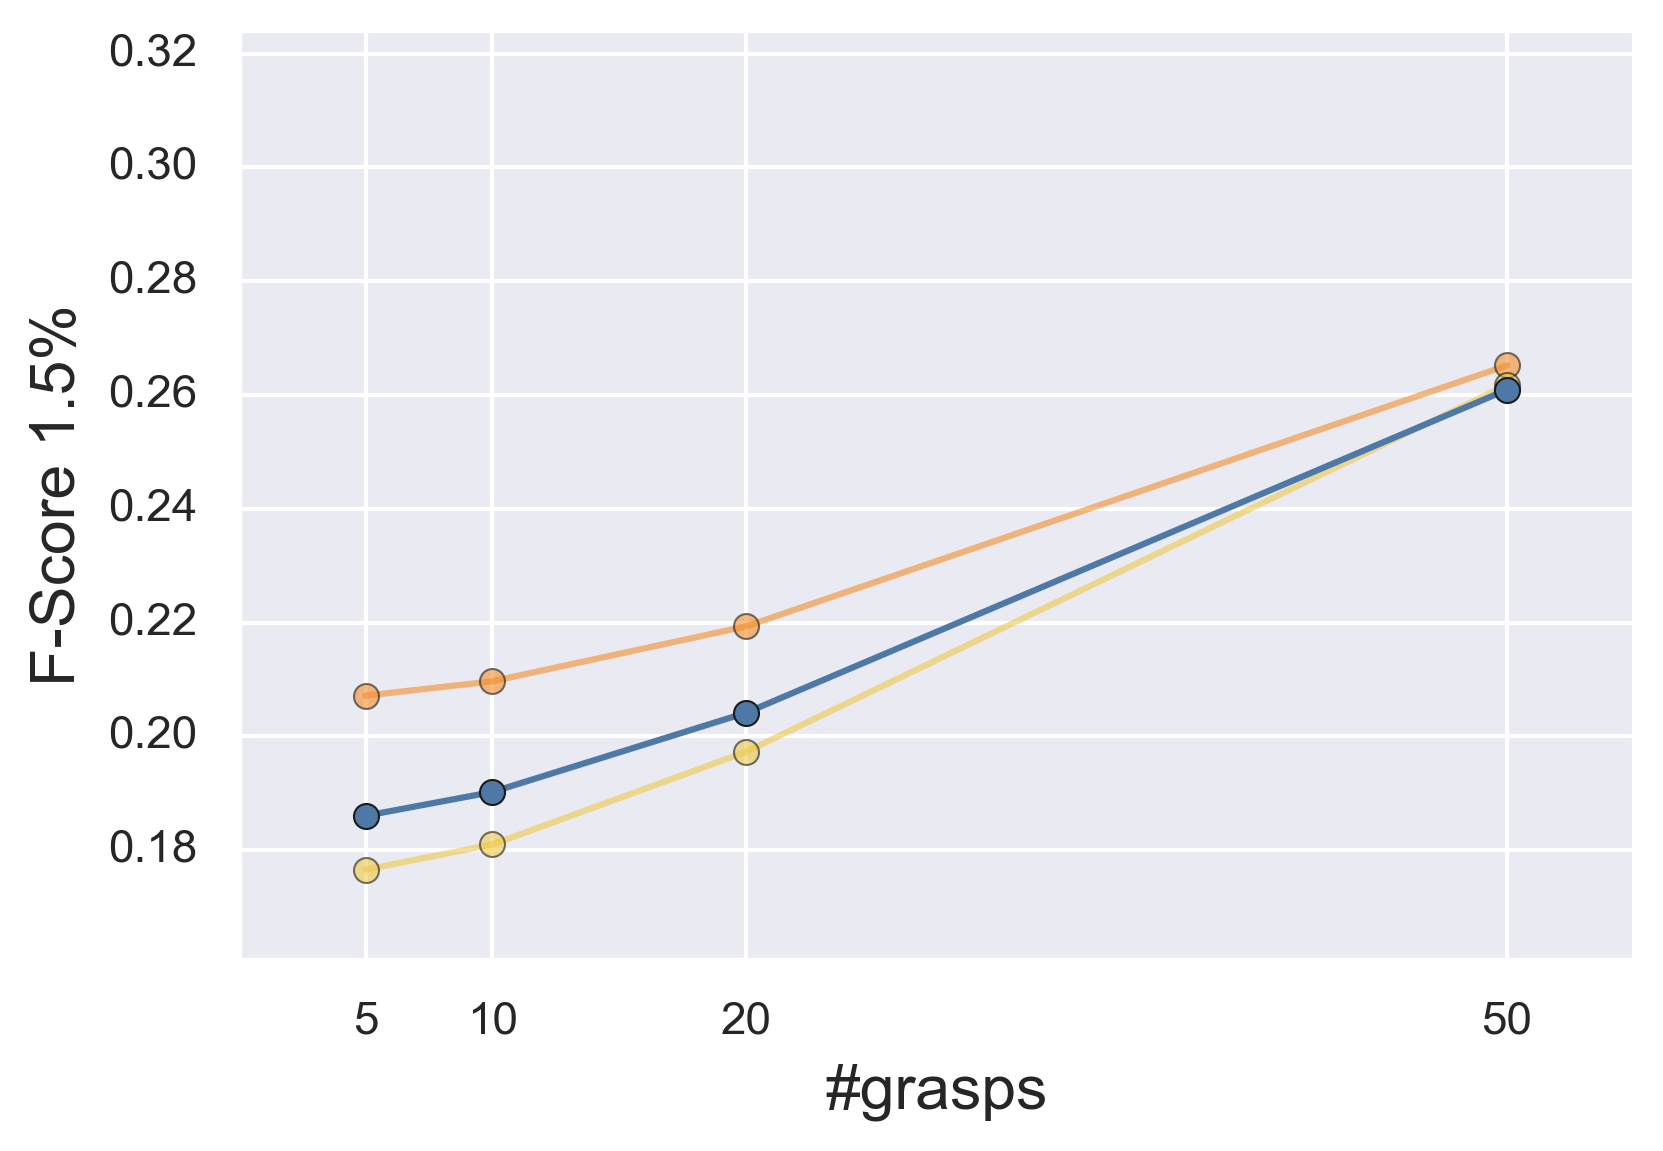

In [20]:
df = eval_all_contr.pivot(index='#grasps', columns='experiment', values="iou (mesh)")
df = df[col_sort]
y_top = df.max().max() * 1.3
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
ax.set_ylabel("IoU", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)
#ax.set_title(metric,fontsize= 15)

df = eval_all_contr.pivot(index='#grasps', columns='experiment', values="chamfer-L1 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Chamfer-L1", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all_contr.pivot(index='#grasps', columns='experiment', values="normals completeness (mesh)")
df = df[col_sort]
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Normal C.", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all_contr.pivot(index='#grasps', columns='experiment', values="f-score-15 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("F-Score 1.5%", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

## Scale + Rotatation + Grasps

In [21]:
experiments_colors = {
    "Vanilla": '#f28e2b' + '99',
    "Scale + Rotation": '#edc948' + '99',
    "Grasps": '#4E79A7' + 'B3',
    "Scale + Rotatation + Grasps": '#59a14f' + 'FF'
}

col_sort = ["Vanilla", "Scale + Rotation", "Grasps", "Scale + Rotatation + Grasps"]

Text(0.5, 0, '#grasps')

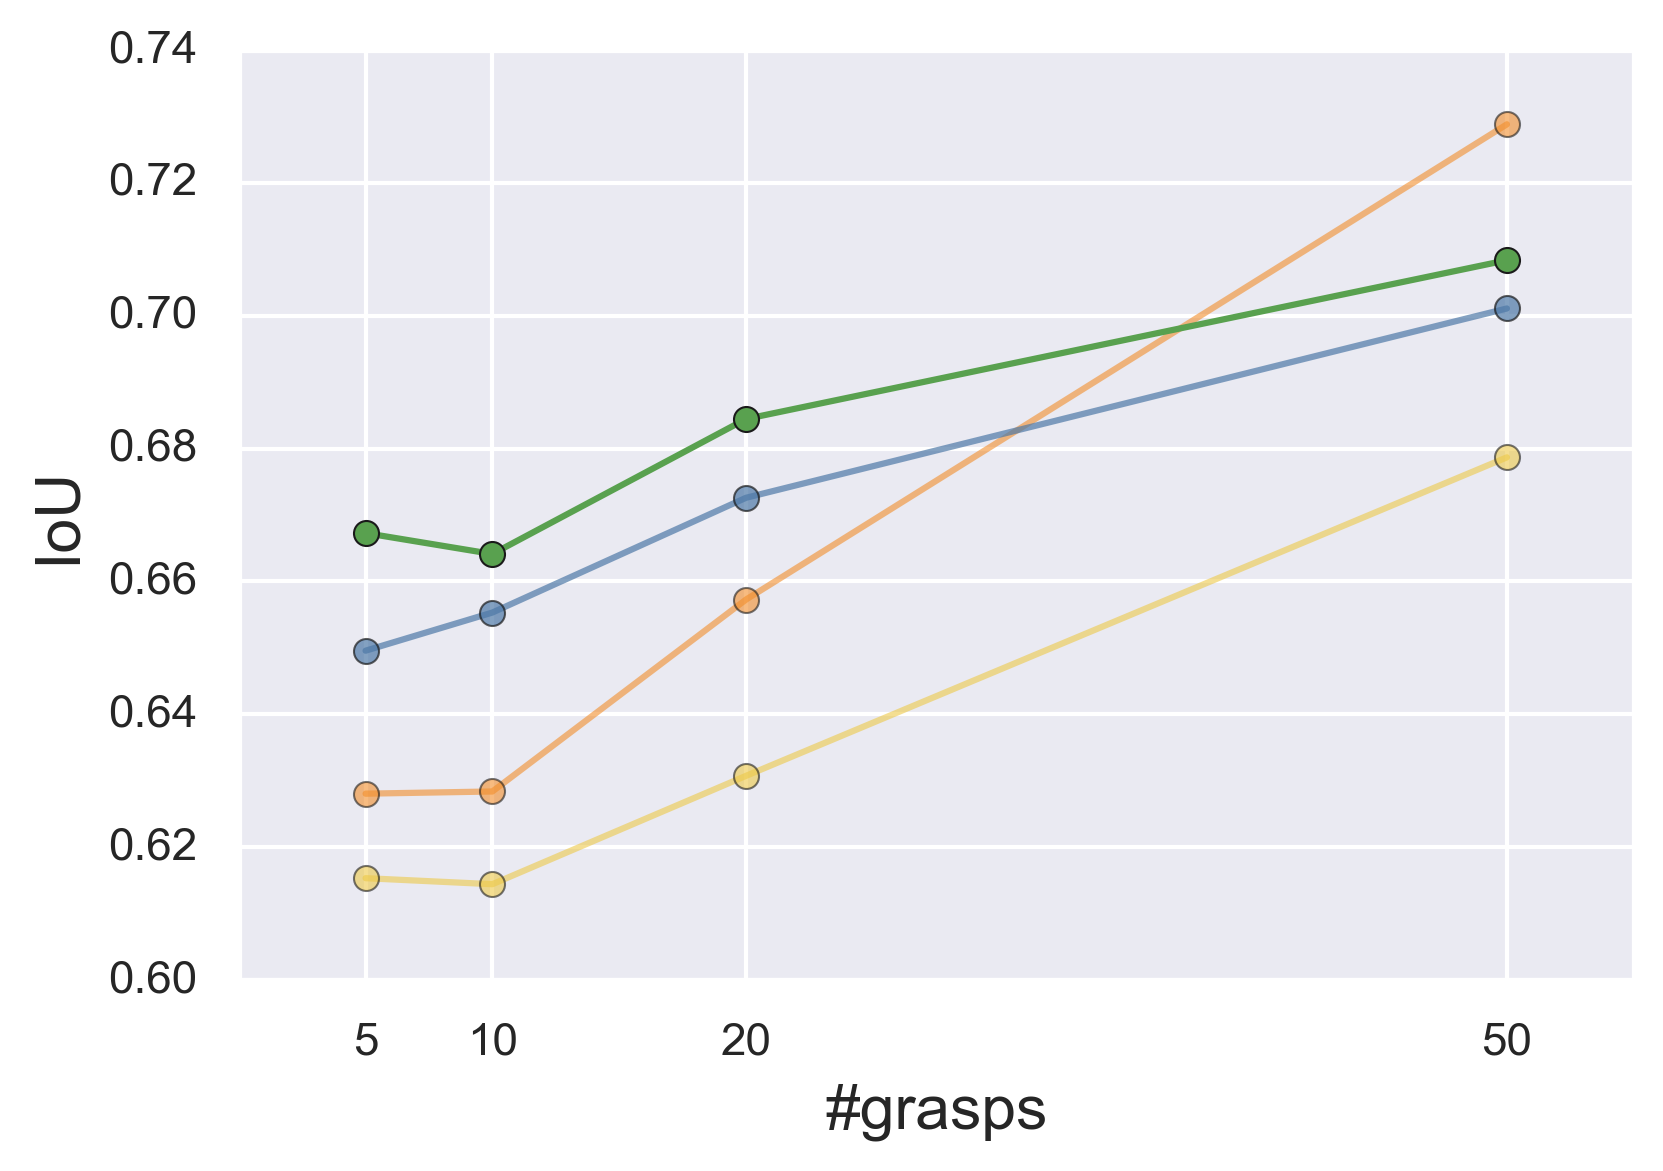

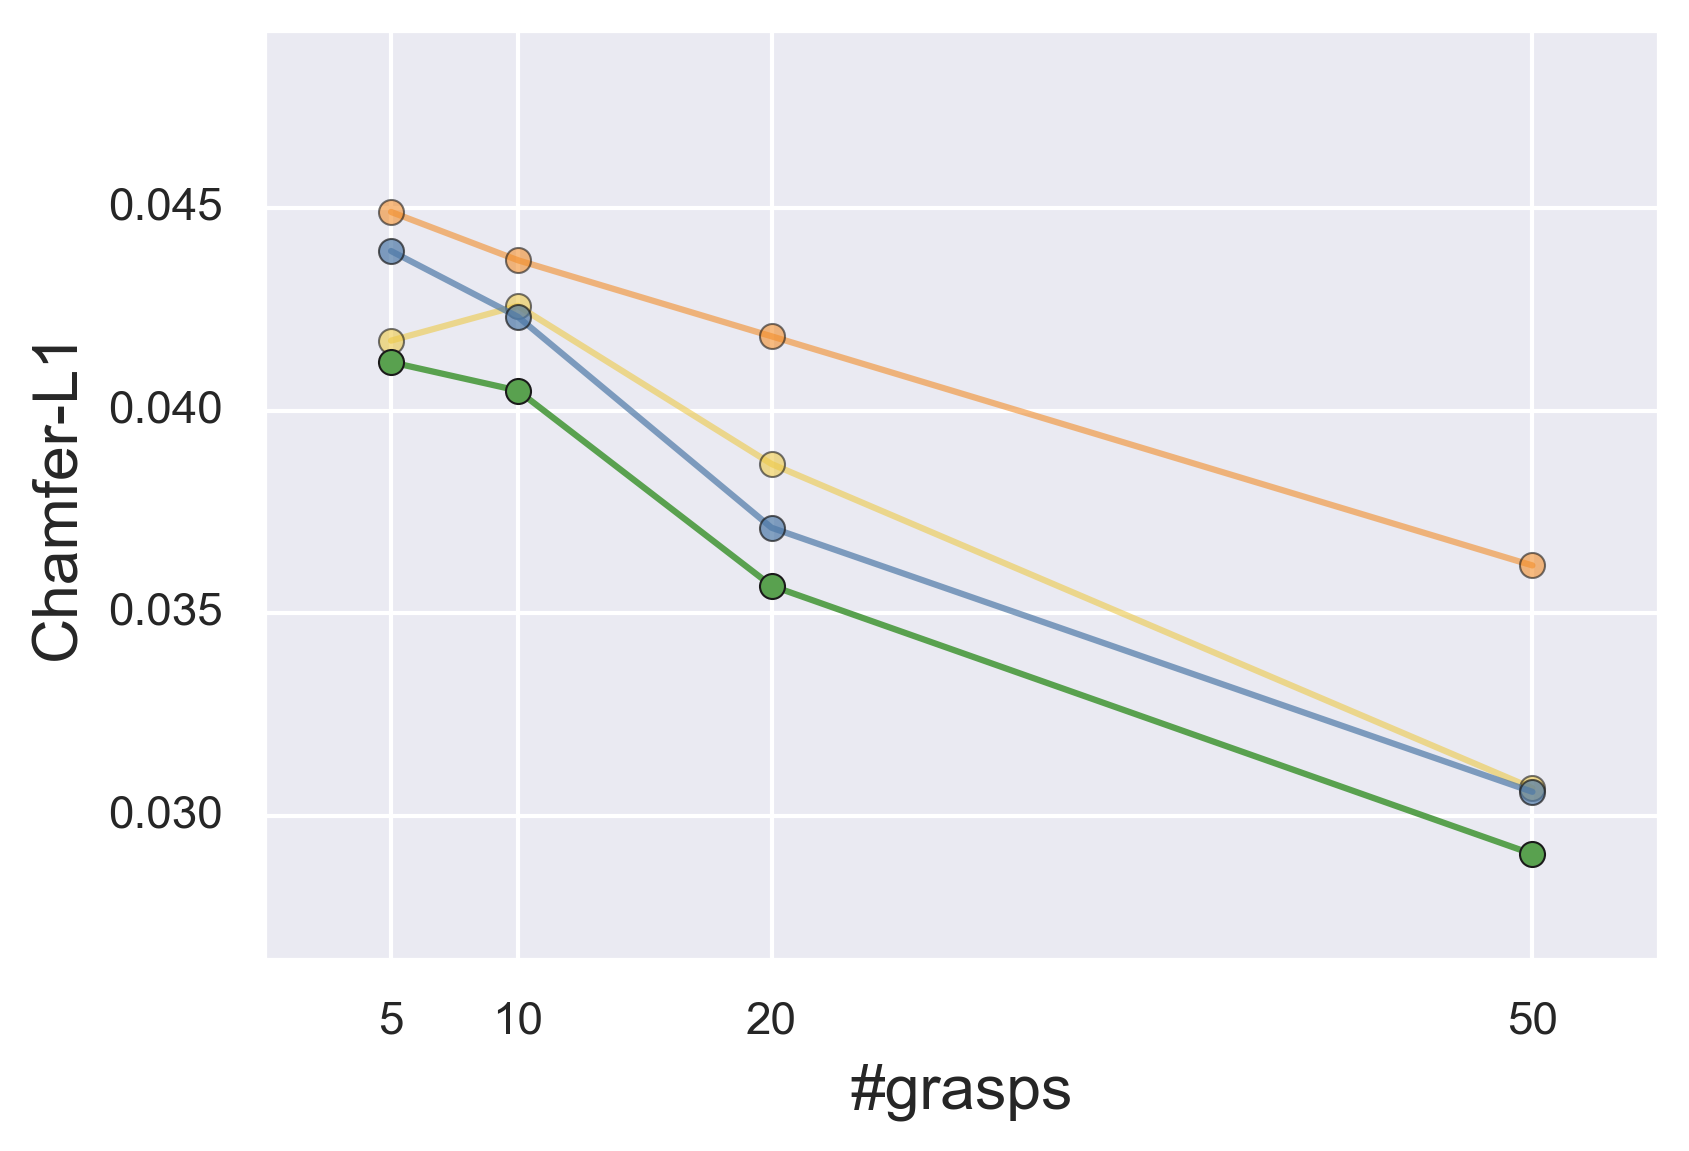

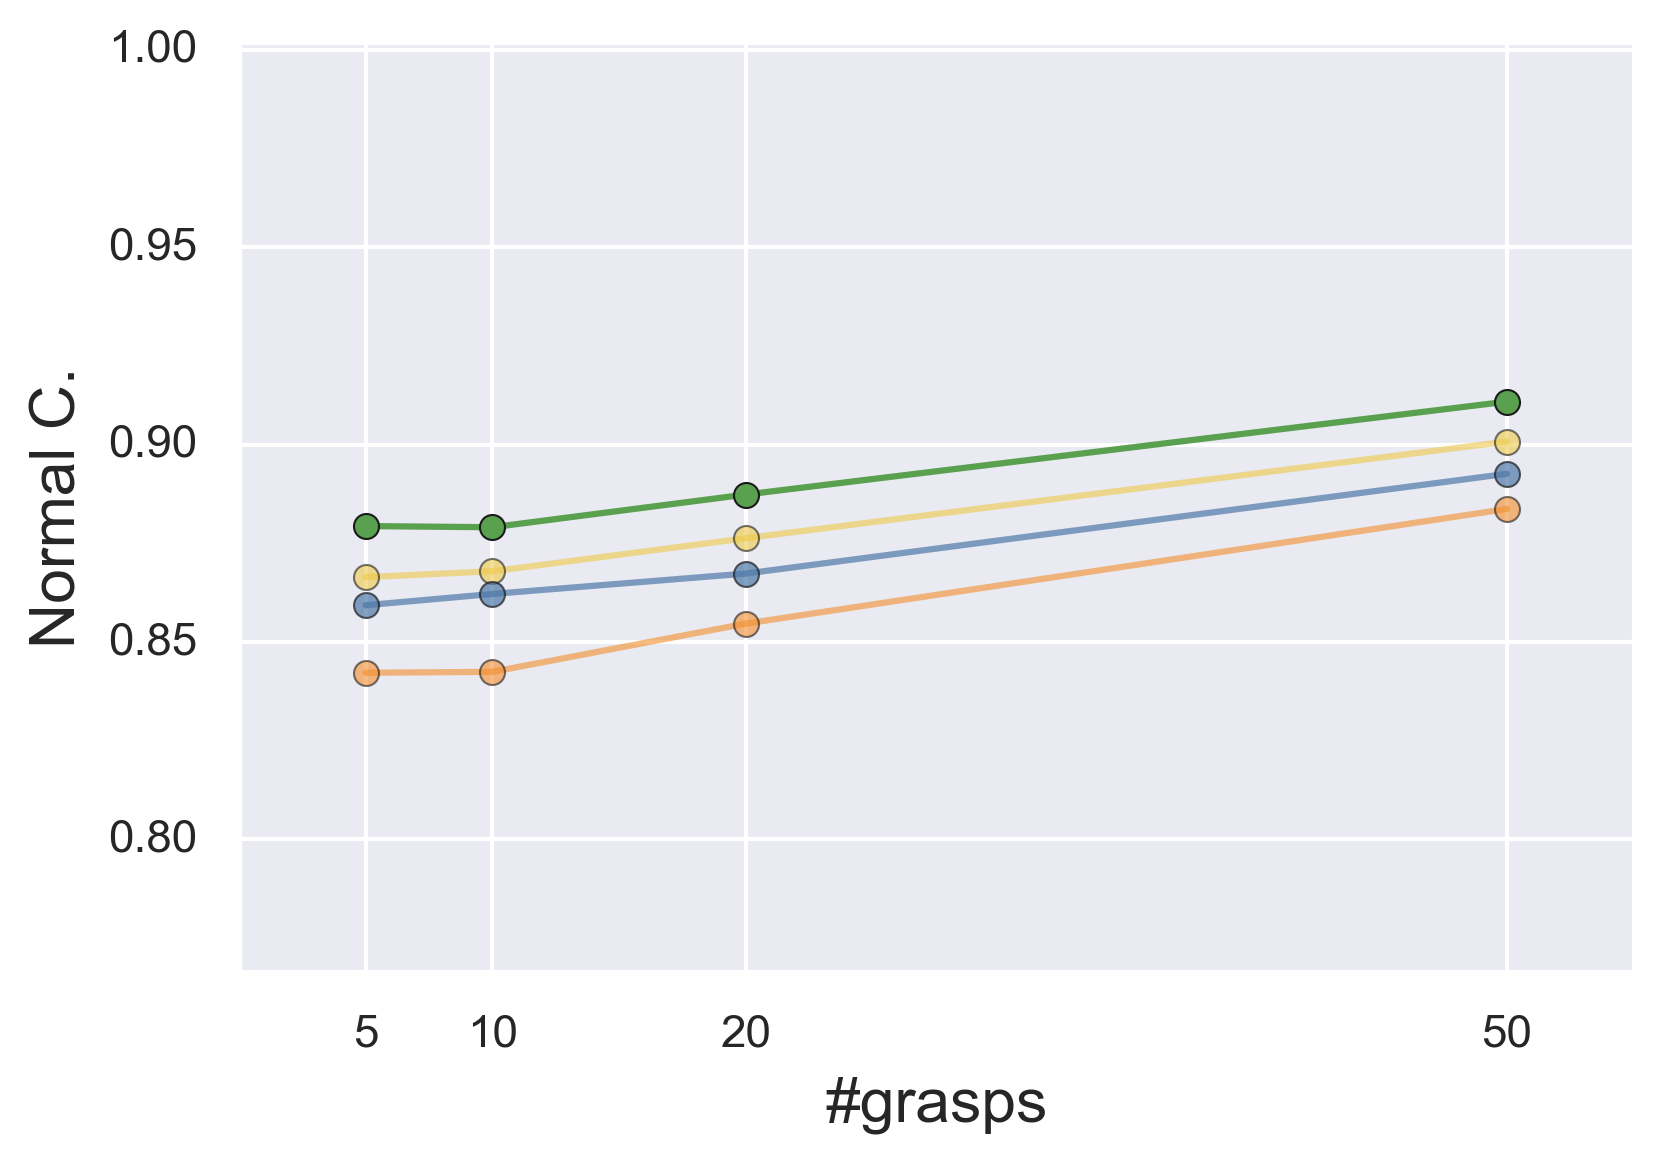

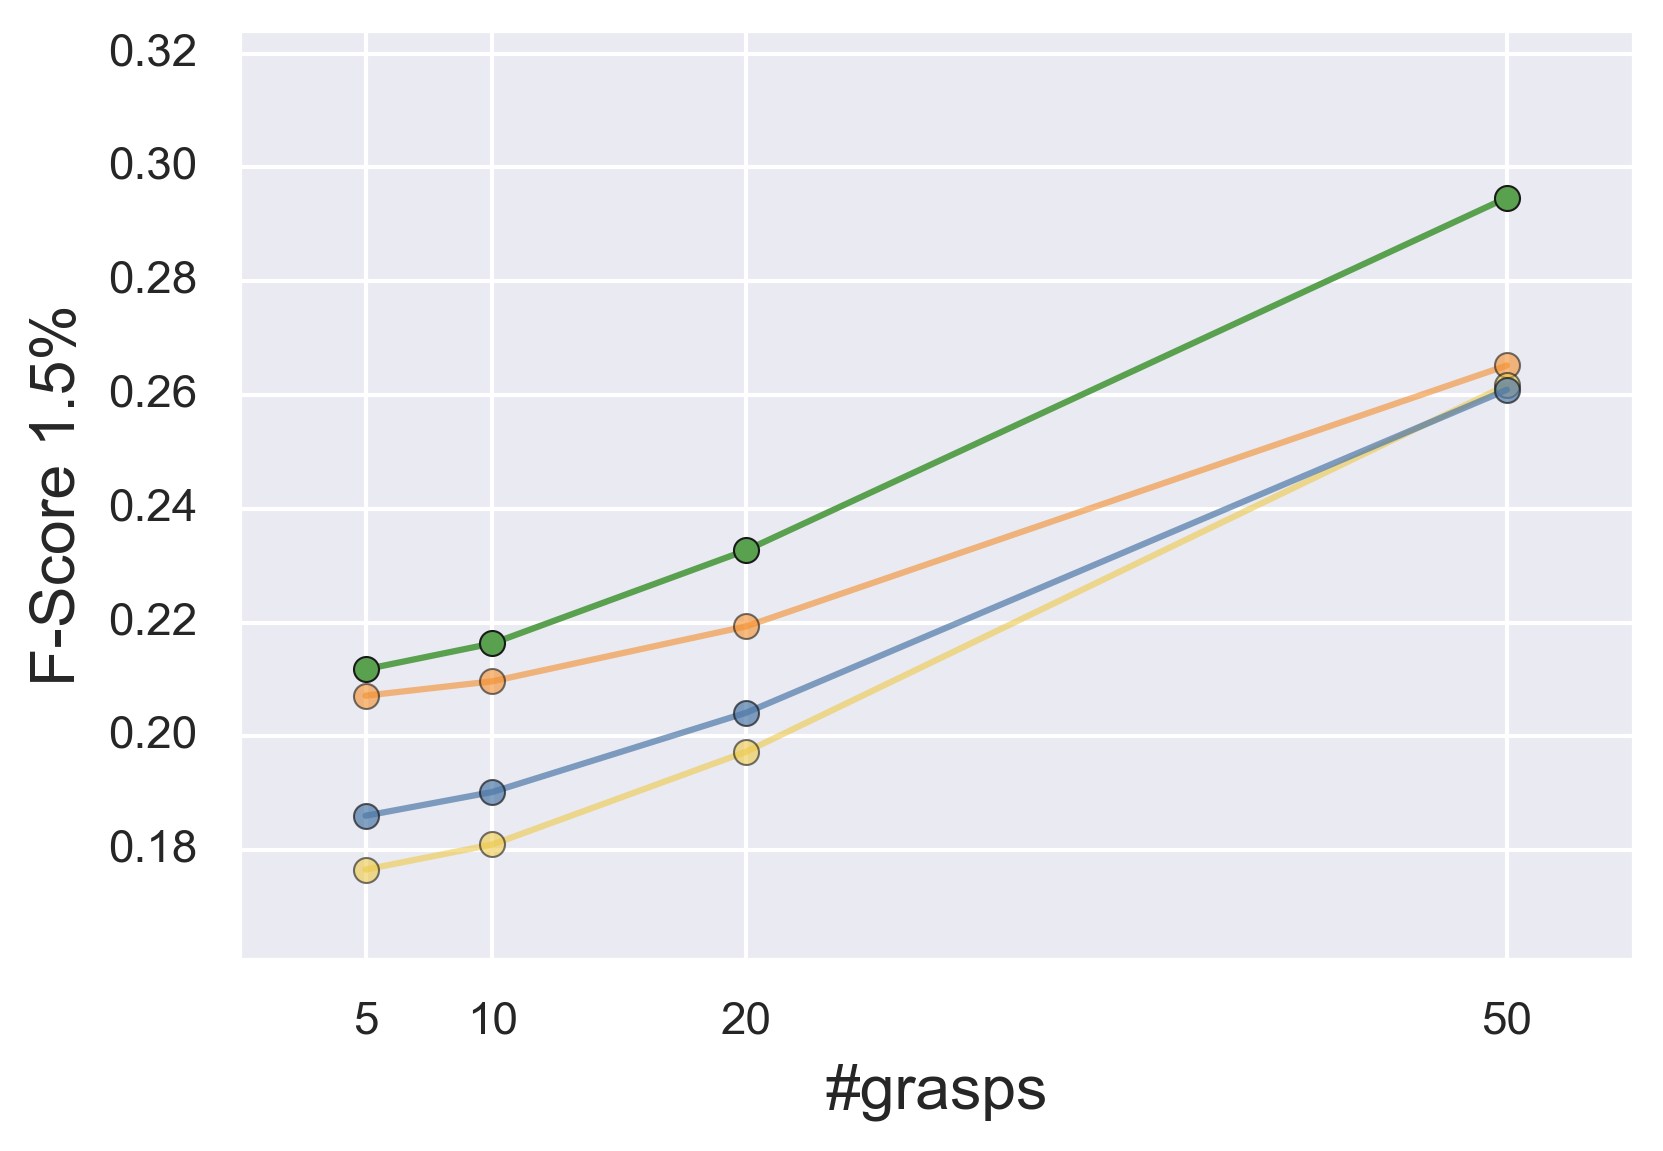

In [22]:
df = eval_all_contr.pivot(index='#grasps', columns='experiment', values="iou (mesh)")
df = df[col_sort]
y_top = df.max().max() * 1.3
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
ax.set_ylabel("IoU", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)
#ax.set_title(metric,fontsize= 15)

df = eval_all_contr.pivot(index='#grasps', columns='experiment', values="chamfer-L1 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Chamfer-L1", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all_contr.pivot(index='#grasps', columns='experiment', values="normals completeness (mesh)")
df = df[col_sort]
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("Normal C.", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

df = eval_all_contr.pivot(index='#grasps', columns='experiment', values="f-score-15 (mesh)")
df = df[col_sort]
ax = df.plot(marker='o', xlim=(0,55), xticks=[5, 10,  20, 50], color=experiments_colors, legend=False)
y_min = df.min().min() * 0.91 
y_top = df.max().max() * 1.1
ax.set_ylim(y_min,y_top)
ax.set_ylabel("F-Score 1.5%", fontsize= 15)
ax.set_xlabel("#grasps", fontsize= 15)

# Read distribution

In [1]:
import pandas as pd

import pickle

import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
with open("Y:/data/ycb_con_grasps_2/5_grasps/test.lst", "r") as file_handle:
    objects_5 = file_handle.read().split()

with open("Y:/data/ycb_con_grasps_2/10_grasps/test.lst", "r") as file_handle:
    objects_10 = file_handle.read().split()

with open("Y:/data/ycb_con_grasps_2/20_grasps/test.lst", "r") as file_handle:
    objects_20 = file_handle.read().split()

with open("Y:/data/ycb_con_grasps_2/50_grasps/test.lst", "r") as file_handle:
    objects_50 = file_handle.read().split()
    
all_objects = objects_5 + objects_10 + objects_20 + objects_50

In [35]:
# Vanilla
pth = "Y:/out/pointcloud/ycb_con/generation_grasps/eval_meshes_full.pkl"
eval_vanilla = pickle.load( open( pth, "rb" ) )

eval_vanilla['object id'] = all_objects
eval_vanilla['object'] = eval_vanilla.apply(lambda x: x['object id'][:x['object id'].rindex("_")], axis=1)
eval_vanilla['Experiment'] = 'Vanilla'

# SR
pth = "Y:/out/pointcloud/ycb_sr/generation_grasps/eval_meshes_full.pkl"
eval_sr = pickle.load( open( pth, "rb" ) )

eval_sr['object id'] = all_objects
eval_sr['object'] = eval_sr.apply(lambda x: x['object id'][:x['object id'].rindex("_")], axis=1)
eval_sr['Experiment'] = 'Scale + Rotate'

In [70]:
eval_full = pd.concat([eval_vanilla, eval_sr])
eval_full[""] = ""

eval_full['#grasps'] = eval_full.apply(lambda x: x['object id'].split('_')[-1].split('-')[0], axis=1)

In [71]:
eval_full.columns

Index(['accuracy (mesh)', 'accuracy2 (mesh)', 'chamfer-L1 (mesh)',
       'chamfer-L2 (mesh)', 'class id', 'class name', 'completeness (mesh)',
       'completeness2 (mesh)', 'f-score (mesh)', 'f-score-15 (mesh)',
       'f-score-20 (mesh)', 'iou (mesh)', 'modelname', 'normals (mesh)',
       'normals accuracy (mesh)', 'normals completeness (mesh)', 'object id',
       'object', 'Experiment', '', '#grasps'],
      dtype='object')

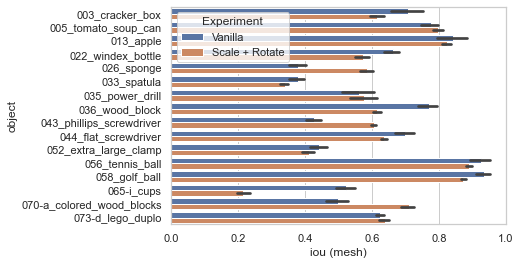

In [37]:
ax = sns.barplot(y="object", x='iou (mesh)', hue='Experiment', data=eval_full)

In [ ]:
ax = sns.barplot(y="object", x='iou (mesh)', hue='Experiment', data=eval_full)

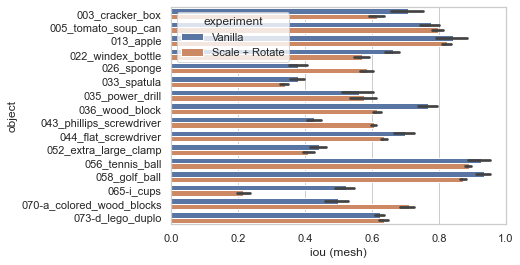

In [33]:
ax = sns.barplot(y="object", x='chamfer-L1 (mesh)', hue='Experiment', data=eval_full)

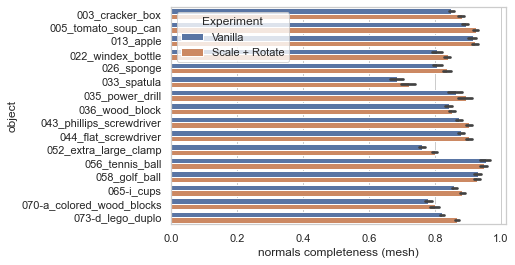

In [43]:
ax = sns.barplot(y="object", x='normals completeness (mesh)', hue='Experiment', data=eval_full)

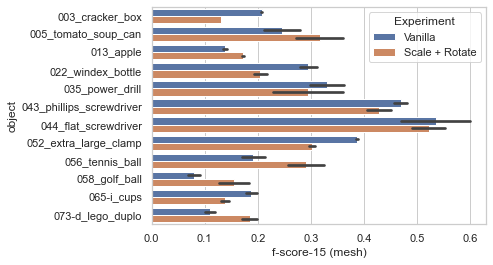

In [88]:
ax = sns.barplot(y="object", x='f-score-15 (mesh)', hue='Experiment', data=eval_full[eval_full['#grasps']=='50'])

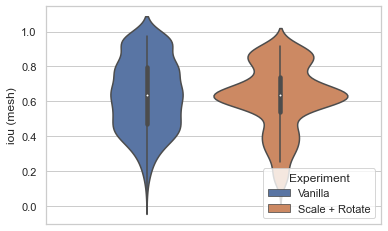

In [76]:
ax = sns.violinplot(x='', y='iou (mesh)', hue='Experiment', split=True,  data=eval_full)

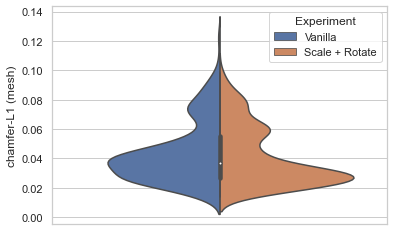

In [40]:
ax = sns.violinplot(x='', y='chamfer-L1 (mesh)', hue='Experiment', split=True,  data=eval_full)

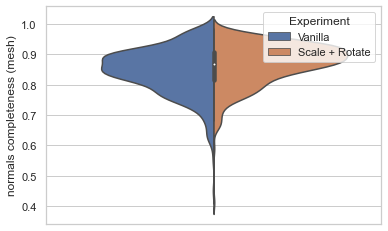

In [41]:
ax = sns.violinplot(x='', y='normals completeness (mesh)', hue='Experiment', split=True,  data=eval_full)

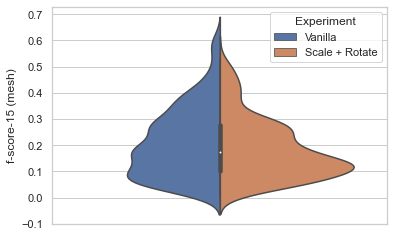

In [42]:
ax = sns.violinplot(x='', y='f-score-15 (mesh)', hue='Experiment', split=True,  data=eval_full)

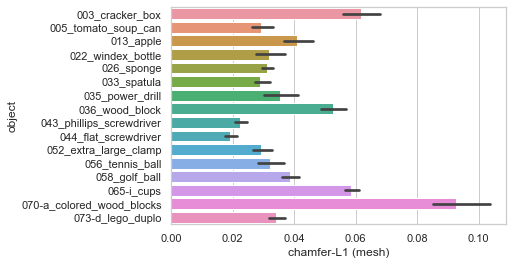

In [64]:
ax = sns.barplot(y="object", x='chamfer-L1 (mesh)', data=eval_full)

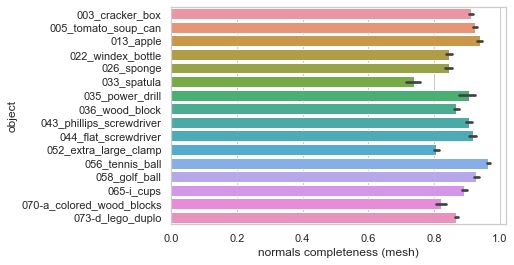

In [65]:
ax = sns.barplot(y="object", x='normals completeness (mesh)', data=eval_full)

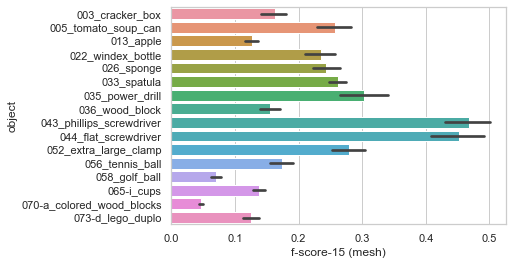

In [66]:
ax = sns.barplot(y="object", x='f-score-15 (mesh)', data=eval_full)

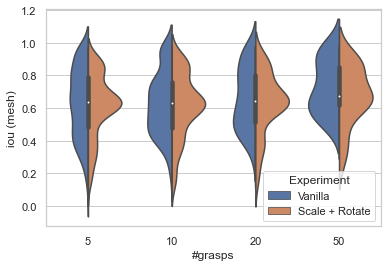

In [81]:
ax = sns.violinplot(x='#grasps', y='iou (mesh)', hue='Experiment',  split=True, data=eval_full)

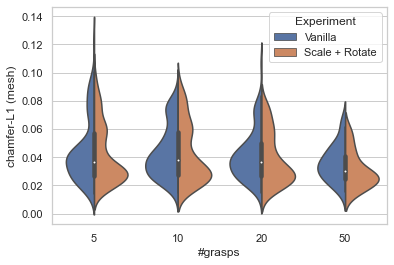

In [83]:
ax = sns.violinplot(x='#grasps', y='chamfer-L1 (mesh)', hue='Experiment',  split=True, data=eval_full)

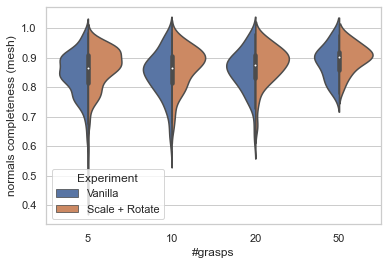

In [84]:
ax = sns.violinplot(x='#grasps', y='normals completeness (mesh)', hue='Experiment',  split=True, data=eval_full)

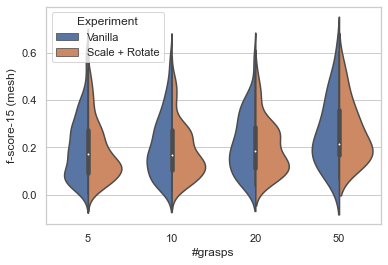

In [85]:
ax = sns.violinplot(x='#grasps', y='f-score-15 (mesh)', hue='Experiment',  split=True, data=eval_full)